In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
from glob import glob

In [4]:
import keras
import keras.backend as k

Using TensorFlow backend.


In [5]:
os.listdir()


['.ipynb_checkpoints',
 'cardio_attn_weights.best.hdf5',
 'final_withImage.ipynb',
 'Mura CNN.ipynb',
 'MURA-v1.1',
 'MURA-v1.1.zip']

In [6]:
PATH="MURA-v1.1/"


In [7]:
os.listdir(PATH)


['train',
 'train_image_paths.csv',
 'train_labeled_studies.csv',
 'valid',
 'valid_image_paths.csv',
 'valid_labeled_studies.csv']

In [8]:
train_imgs_path=pd.read_csv(PATH+'train_image_paths.csv')
train_labels=pd.read_csv(PATH+'train_labeled_studies.csv')
test_imgs_path=pd.read_csv(PATH+'valid_image_paths.csv')
test_labels=pd.read_csv(PATH+'valid_labeled_studies.csv')

In [9]:
train_imgs_path.head()


,Img_Path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [10]:
train_imgs_path.shape


(36808, 1)

In [11]:
train_labels.head()


,Img_Path,Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [12]:
train_labels['Label'].value_counts()


0    8280
1    5177
Name: Label, dtype: int64

In [13]:
test_imgs_path.head()


,Img_Path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [14]:
test_imgs_path.shape


(3197, 1)

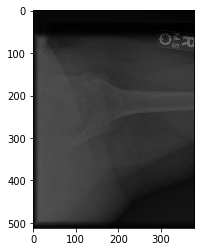

(512, 380, 3)


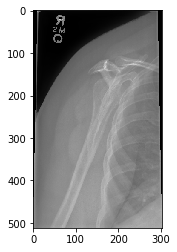

(512, 303, 3)


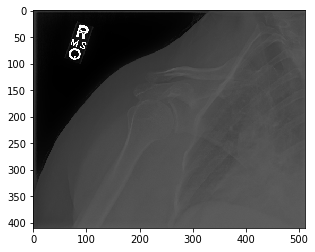

(410, 512, 3)


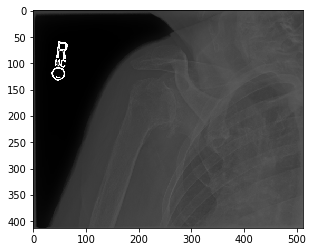

(413, 512, 3)


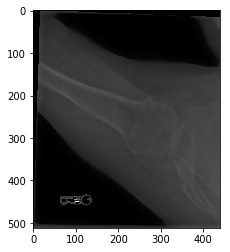

(512, 440, 3)


In [15]:
for path in train_imgs_path.values[:5]:
    img=cv2.imread(path[0])
    plt.imshow(plt.imread(path[0]))
    plt.imshow(img)
    plt.show()
    print (img.shape)

In [16]:
train_labels['Body_Part']=train_labels['Img_Path'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study_Type']=train_labels['Img_Path'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['Body_Part']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study_Type']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[4])[:6])

In [17]:
train_labels.head()


,Img_Path,Label,Body_Part,Study_Type
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,SHOULDER,study1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,SHOULDER,study1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1,SHOULDER,study1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1,SHOULDER,study1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1,SHOULDER,study1


In [18]:
test_labels.head()


,Img_Path,Label,Body_Part,Study_Type
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,WRIST,study1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,WRIST,study1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1,WRIST,study2
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1,WRIST,study3
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,WRIST,study1


In [19]:
import seaborn as sns


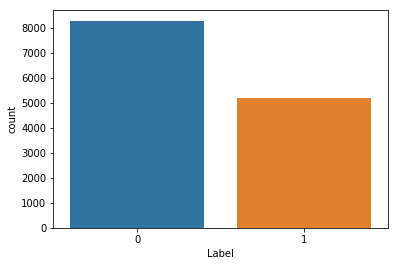

In [20]:
sns.countplot(train_labels['Label'])


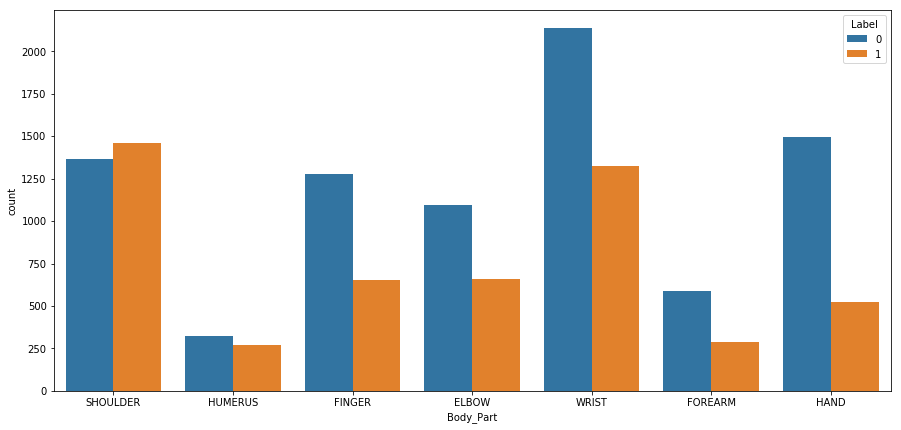

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Body_Part',hue='Label')

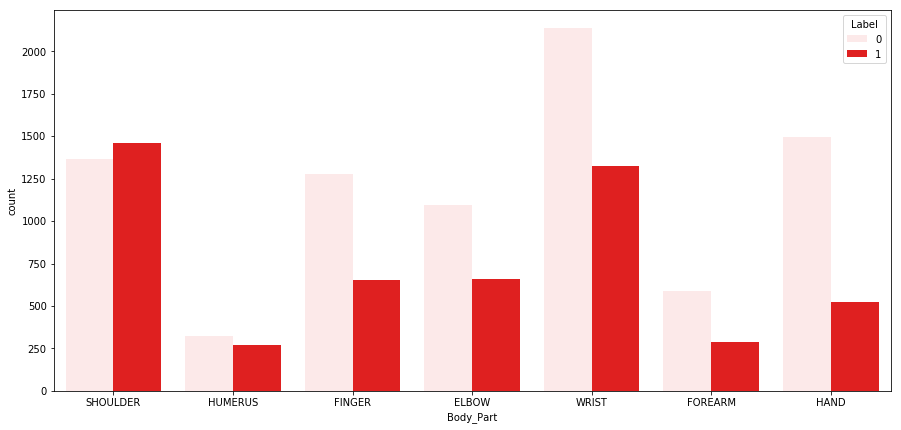

In [60]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Body_Part',color='red', linestyle='dashed',hue='Label')

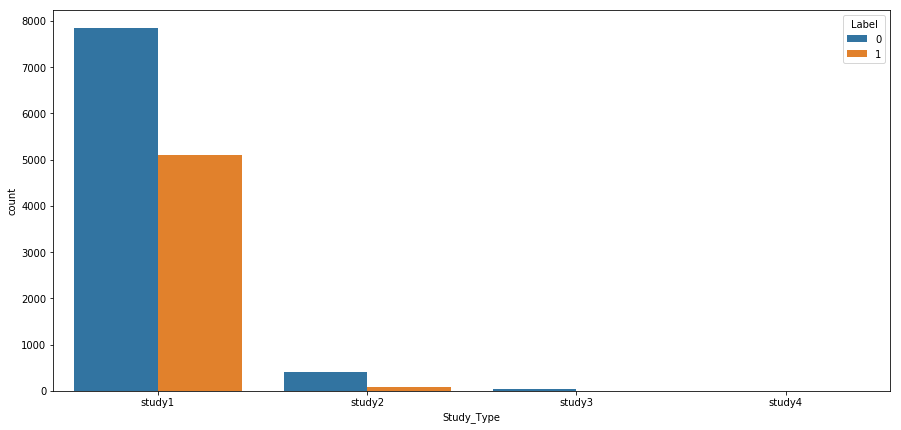

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Study_Type',hue='Label')

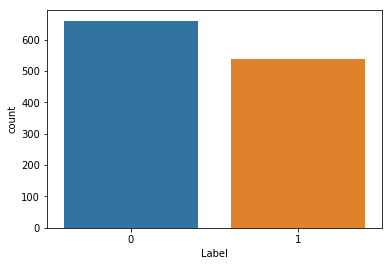

In [23]:
sns.countplot(test_labels['Label'])


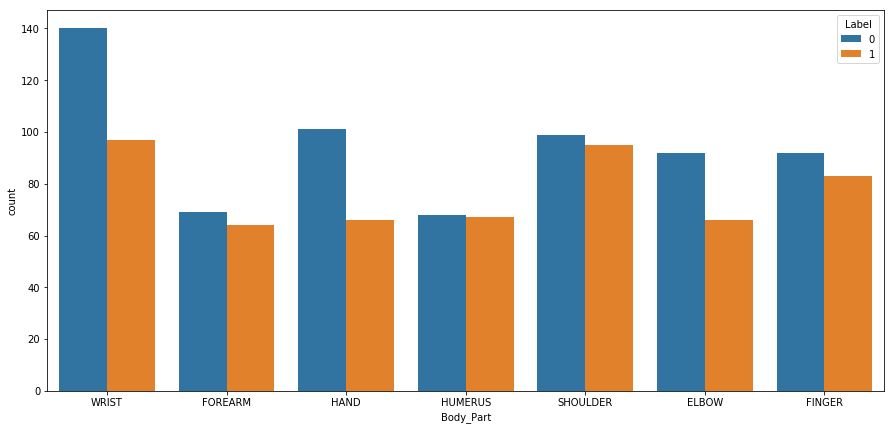

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Body_Part',hue='Label')

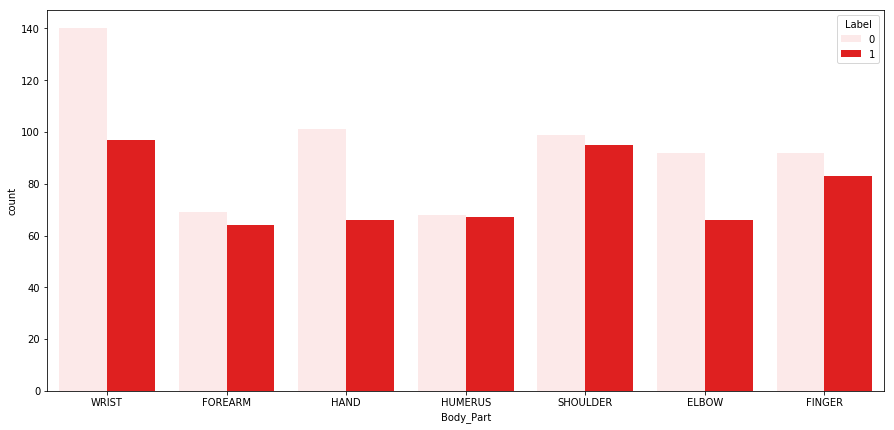

In [63]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Body_Part',color = 'red', hue='Label')

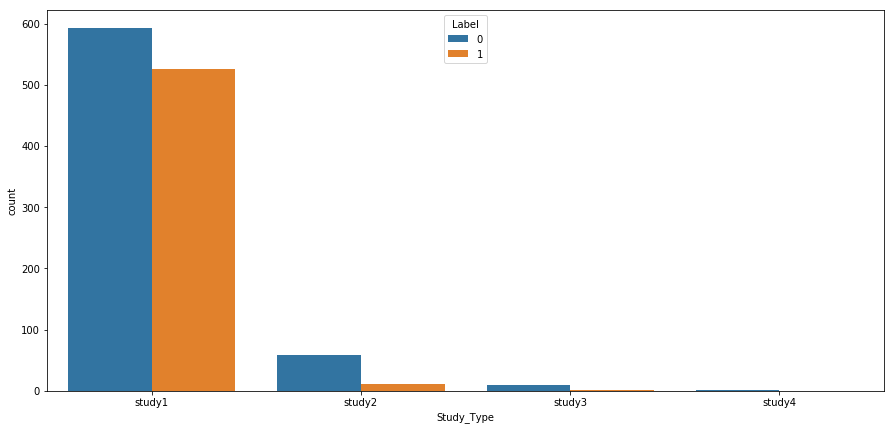

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Study_Type',hue='Label')

In [26]:
from tqdm import tqdm
from PIL import Image

In [27]:
def read_image(Path):
    img=cv2.imread(Path)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(224,224))
    #print (img.shape)
    img=np.array(img)
    #img=np.resize(img,(224,224))
    #print (img.shape)
    img=img/255.
    return img

In [28]:

X_train=[]
X_val=[]

In [29]:
import torch


In [30]:
torch.cuda.is_available()


True

In [31]:
train_labels['Img_Path']=train_imgs_path['Img_Path']
test_labels['Img_Path']=test_imgs_path['Img_Path']

In [32]:
train_df=train_labels.groupby(['Label']).apply(lambda x: x.sample(5000,replace=True))


In [33]:
train_df.shape


(10000, 4)

In [34]:
train_labels.shape


(13457, 4)

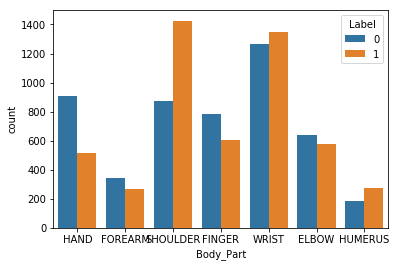

In [35]:
sns.countplot(data=train_df,x='Body_Part',hue='Label')


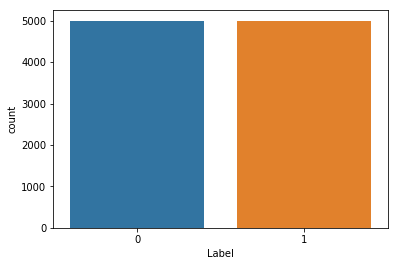

In [36]:
sns.countplot(train_df['Label'])


In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions

In [38]:
IMG_SIZE=(224,224)


In [39]:
datagen=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

In [40]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [41]:
train_gen = flow_from_dataframe(datagen, train_df, 
                             path_col = 'Img_Path',
                            y_col = 'Label', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 10000 images


In [42]:
alid_gen = flow_from_dataframe(datagen, test_labels, 
                             path_col = 'Img_Path',
                            y_col = 'Label', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1199 images


In [51]:
test_X, test_Y = next(flow_from_dataframe(datagen, 
                               test_labels, 
                             path_col = 'Img_Path',
                            y_col = 'Label', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = -1)) # one big batch
# used a fixed dataset for final evaluation
final_test_X, final_test_Y = next(flow_from_dataframe(datagen, 
                            test_labels, 
                            path_col = 'Img_Path',
                            y_col = 'Label',
                            target_size = IMG_SIZE,
                            color_mode = 'rgb',
                            batch_size = 64)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1199 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1199 images


In [44]:
t_x,t_y=next(train_gen)

In [45]:
t_x.shape,t_y.shape

((64, 224, 224, 3), (64,))

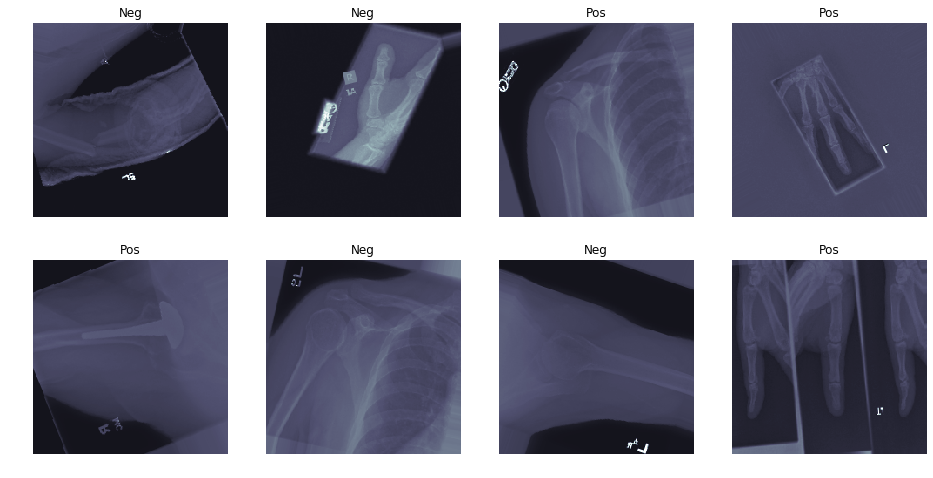

In [46]:
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -127, vmax = 127)
    c_ax.set_title('%s' % ('Pos' if c_y>0.5 else 'Neg'))
    c_ax.axis('off')

In [47]:
from keras.layers import  Convolution2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import  Sequential

In [66]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = t_x.shape[1:]))
#if you resize the image above, change the input shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [52]:
#### ITERATION 2#####
model2 = Sequential()
model2.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = t_x.shape[1:]))
#if you resize the image above, change the input shape
model2.add(Convolution2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model2.add(Convolution2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# model2.add(Convolution2D(32, (3,3), activation='relu', padding='same'))
# model2.add(Convolution2D(32, (3,3), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='softmax'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 52, 52, 32)        9248      
___________________________

In [53]:
## ITERATION 2 ###
train_gen.batch_size = 64
model2.fit_generator(train_gen, 
                      validation_data = (test_X, test_Y),
                      epochs = 20,
                      steps_per_epoch = 10,
                      workers = 3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
10/10 [==============================] - ETA: 2:00 - loss: 6.9748 - acc: 0.562 - ETA: 1:32 - loss: 6.8502 - acc: 0.570 - ETA: 1:15 - loss: 7.3069 - acc: 0.541 - ETA: 1:02 - loss: 7.0371 - acc: 0.558 - ETA: 50s - loss: 7.2239 - acc: 0.546 - ETA: 40s - loss: 7.3069 - acc: 0.54 - ETA: 29s - loss: 7.5442 - acc: 0.52 - ETA: 19s - loss: 7.8155 - acc: 0.50 - ETA: 9s - loss: 7.6944 - acc: 0.5174 - 165s 16s/step - loss: 7.6225 - acc: 0.5219 - val_loss: 8.7963 - val_acc: 0.4482
Epoch 2/20
10/10 [==============================] - ETA: 1:24 - loss: 6.9748 - acc: 0.562 - ETA: 1:15 - loss: 7.5975 - acc: 0.523 - ETA: 1:06 - loss: 7.3069 - acc: 0.541 - ETA: 56s - loss: 7.4730 - acc: 0.531 - ETA: 47s - loss: 7.3734 - acc: 0.53 - ETA: 37s - loss: 7.3069 - acc: 0.54 - ETA: 28s - loss: 7.4730 - acc: 0.53 - ETA: 18s - loss: 7.5041 - acc: 0.52 - ETA: 9s - loss: 7.6667 - acc: 0.5191 - 164s 16s/step - loss: 7.6723 - acc: 0.5187 - val_loss: 8.7963 - va

10/10 [==============================] - ETA: 1:20 - loss: 7.2239 - acc: 0.546 - ETA: 1:12 - loss: 7.5975 - acc: 0.523 - ETA: 1:03 - loss: 7.6391 - acc: 0.520 - ETA: 54s - loss: 7.5975 - acc: 0.523 - ETA: 45s - loss: 7.3734 - acc: 0.53 - ETA: 36s - loss: 7.7636 - acc: 0.51 - ETA: 27s - loss: 7.6153 - acc: 0.52 - ETA: 18s - loss: 7.7221 - acc: 0.51 - ETA: 9s - loss: 7.8605 - acc: 0.5069 - 155s 15s/step - loss: 7.6723 - acc: 0.5187 - val_loss: 8.7963 - val_acc: 0.4482
Epoch 18/20
10/10 [==============================] - ETA: 1:22 - loss: 7.4730 - acc: 0.531 - ETA: 1:12 - loss: 7.8466 - acc: 0.507 - ETA: 1:03 - loss: 8.5524 - acc: 0.463 - ETA: 54s - loss: 8.4071 - acc: 0.472 - ETA: 45s - loss: 8.5192 - acc: 0.46 - ETA: 36s - loss: 8.4694 - acc: 0.46 - ETA: 27s - loss: 8.5761 - acc: 0.46 - ETA: 18s - loss: 8.3760 - acc: 0.47 - ETA: 9s - loss: 8.3587 - acc: 0.4757 - 144s 14s/step - loss: 8.2452 - acc: 0.4828 - val_loss: 8.7963 - val_acc: 0.4482
Epoch 19/20
10/10 [===========================

In [54]:
accuracy = model2.evaluate(test_X, test_Y)
accuracy

1198/1198 [==============================] - ETA: 57 - ETA: 59 - ETA: 59 - ETA: 58 - ETA: 57 - ETA: 55 - ETA: 53 - ETA: 52 - ETA: 50 - ETA: 49 - ETA: 47 - ETA: 45 - ETA: 44 - ETA: 42 - ETA: 40 - ETA: 38 - ETA: 36 - ETA: 35 - ETA: 33 - ETA: 31 - ETA: 29 - ETA: 27 - ETA: 26 - ETA: 24 - ETA: 22 - ETA: 20 - ETA: 18 - ETA: 17 - ETA: 15 - ETA: 13 - ETA: 11 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 68s 57ms/step


[8.796257979085729, 0.4482470785636138]

In [67]:
model.fit_generator(train_gen, 
                      validation_data = (test_X, test_Y), 
                      epochs = 30, 
                      callbacks = callbacks_list,
                      workers = 3)

NameError: name 'callbacks_list' is not defined

In [68]:
base_model=VGG16(input_shape=t_x.shape[1:],include_top=False,weights='imagenet')
base_model.trainable=False

In [69]:
base_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [70]:
from keras.layers import *
from keras.models import *

In [71]:
pt_features = Input(base_model.get_output_shape_at(0)[1:], name = 'feature_input')
pt_depth = base_model.get_output_shape_at(0)[-1]

In [72]:
pt_features

<tf.Tensor 'feature_input:0' shape=(?, 7, 7, 512) dtype=float32>

In [73]:
pt_depth


512

In [74]:
bn_features = BatchNormalization()(pt_features)
# here we do an attention mechanism to turn pixels in the GAP on an off
attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'elu')(bn_features)
attn_layer = Conv2D(32, kernel_size = (1,1), padding = 'same', activation = 'elu')(attn_layer)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'elu')(attn_layer)
attn_layer = AvgPool2D((2,2), strides = (1,1), padding = 'same')(attn_layer) # smooth results
attn_layer = Conv2D(1, 
                    kernel_size = (1,1), 
                    padding = 'valid', 
                    activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.5)(Dense(128, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'sigmoid')(dr_steps)

attn_model = Model(inputs = [pt_features], outputs = [out_layer], name = 'attention_model')

attn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])

attn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
feature_input (InputLayer)      (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 512)    2048        feature_input[0][0]              
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 7, 7, 128)    65664       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 7, 7, 32)     4128        conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (

In [75]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cardio_attn')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=10) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [76]:
from keras.optimizers import Adam


In [77]:
model = Sequential(name = 'combined_model')
model.add(base_model)
model.add(attn_model)
model.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
attention_model (Model)      (None, 1)                 138690    
Total params: 14,853,378
Trainable params: 137,154
Non-trainable params: 14,716,224
_________________________________________________________________


In [93]:
## OPTIMAL RESULTS, Batch size = 8, Steps = 
train_gen.batch_size = 8
model.fit_generator(train_gen, 
                      validation_data = (test_X, test_Y),
                      epochs = 12,
                      steps_per_epoch = 64,
                      callbacks = callbacks_list,
                      workers = 3)

Epoch 1/12
64/64 [==============================] - ETA: 2:07 - loss: 0.7544 - binary_accuracy: 0.500 - ETA: 1:55 - loss: 0.9200 - binary_accuracy: 0.437 - ETA: 1:52 - loss: 0.8658 - binary_accuracy: 0.416 - ETA: 1:55 - loss: 0.8102 - binary_accuracy: 0.437 - ETA: 1:55 - loss: 0.8184 - binary_accuracy: 0.475 - ETA: 1:54 - loss: 0.8245 - binary_accuracy: 0.458 - ETA: 1:52 - loss: 0.8117 - binary_accuracy: 0.482 - ETA: 1:50 - loss: 0.8211 - binary_accuracy: 0.500 - ETA: 1:47 - loss: 0.8160 - binary_accuracy: 0.513 - ETA: 1:44 - loss: 0.7873 - binary_accuracy: 0.525 - ETA: 1:42 - loss: 0.7753 - binary_accuracy: 0.522 - ETA: 1:40 - loss: 0.7758 - binary_accuracy: 0.520 - ETA: 1:37 - loss: 0.7717 - binary_accuracy: 0.538 - ETA: 1:35 - loss: 0.7664 - binary_accuracy: 0.544 - ETA: 1:33 - loss: 0.7627 - binary_accuracy: 0.541 - ETA: 1:31 - loss: 0.7690 - binary_accuracy: 0.531 - ETA: 1:29 - loss: 0.7692 - binary_accuracy: 0.529 - ETA: 1:27 - loss: 0.7624 - binary_accuracy: 0.541 - ETA: 1:25 - 

64/64 [==============================] - ETA: 1:56 - loss: 0.6303 - binary_accuracy: 0.500 - ETA: 2:00 - loss: 0.6078 - binary_accuracy: 0.625 - ETA: 2:00 - loss: 0.6562 - binary_accuracy: 0.541 - ETA: 1:59 - loss: 0.6476 - binary_accuracy: 0.562 - ETA: 1:55 - loss: 0.6900 - binary_accuracy: 0.525 - ETA: 1:53 - loss: 0.6720 - binary_accuracy: 0.520 - ETA: 1:50 - loss: 0.6739 - binary_accuracy: 0.535 - ETA: 1:48 - loss: 0.6852 - binary_accuracy: 0.546 - ETA: 1:45 - loss: 0.6747 - binary_accuracy: 0.555 - ETA: 1:43 - loss: 0.6805 - binary_accuracy: 0.550 - ETA: 1:42 - loss: 0.6614 - binary_accuracy: 0.556 - ETA: 1:40 - loss: 0.6576 - binary_accuracy: 0.562 - ETA: 1:38 - loss: 0.6665 - binary_accuracy: 0.557 - ETA: 1:36 - loss: 0.6679 - binary_accuracy: 0.562 - ETA: 1:34 - loss: 0.6765 - binary_accuracy: 0.550 - ETA: 1:31 - loss: 0.6874 - binary_accuracy: 0.554 - ETA: 1:29 - loss: 0.6854 - binary_accuracy: 0.558 - ETA: 1:27 - loss: 0.6923 - binary_accuracy: 0.555 - ETA: 1:25 - loss: 0.690

64/64 [==============================] - ETA: 2:01 - loss: 0.5995 - binary_accuracy: 1.000 - ETA: 2:00 - loss: 0.6616 - binary_accuracy: 0.875 - ETA: 1:57 - loss: 0.6314 - binary_accuracy: 0.833 - ETA: 1:55 - loss: 0.6497 - binary_accuracy: 0.750 - ETA: 1:52 - loss: 0.7150 - binary_accuracy: 0.625 - ETA: 1:50 - loss: 0.7427 - binary_accuracy: 0.583 - ETA: 1:48 - loss: 0.7312 - binary_accuracy: 0.607 - ETA: 1:46 - loss: 0.7352 - binary_accuracy: 0.562 - ETA: 1:44 - loss: 0.7325 - binary_accuracy: 0.541 - ETA: 1:42 - loss: 0.7434 - binary_accuracy: 0.537 - ETA: 1:40 - loss: 0.7342 - binary_accuracy: 0.522 - ETA: 1:38 - loss: 0.7247 - binary_accuracy: 0.531 - ETA: 1:36 - loss: 0.7124 - binary_accuracy: 0.538 - ETA: 1:34 - loss: 0.6953 - binary_accuracy: 0.571 - ETA: 1:33 - loss: 0.6811 - binary_accuracy: 0.591 - ETA: 1:31 - loss: 0.6825 - binary_accuracy: 0.585 - ETA: 1:29 - loss: 0.6884 - binary_accuracy: 0.573 - ETA: 1:27 - loss: 0.6751 - binary_accuracy: 0.590 - ETA: 1:25 - loss: 0.697

In [83]:
print(model.evaluate(test_X, test_Y))

64/64 [==============================] - ETA: 13 - 26s 401ms/step
[0.7084944248199463, 0.53125]


In [85]:
accuracy = model.evaluate(test_X, test_Y)

64/64 [==============================] - ETA: 12 - 25s 394ms/step


In [86]:
print(accuracy)

[0.7084944248199463, 0.53125]


In [88]:
accuracy[0]

0.7084944248199463

In [89]:
kappa = (accuracy[0] - accuracy[1])/(1-accuracy[1])

In [91]:
kappa

0.3781214396158854

In [103]:
train_X, train_Y = next(flow_from_dataframe(datagen, 
                               train_labels, 
                             path_col = 'Img_Path',
                            y_col = 'Label', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64))

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 13457 images


In [96]:
import sklearn
from sklearn.metrics import cohen_kappa_score
sklearn.metrics.cohen_kappa_score(train_Y, test_Y, labels=None, weights=None)


-0.18399999999999994

In [98]:
train_gen.batch_size = 8
model.fit_generator(train_gen, 
                      validation_data = (test_X, test_Y),
                      epochs = 30,
                      steps_per_epoch = 5000,
                      callbacks = callbacks_list,
                      workers = 3)

Epoch 1/4


 151/5000 [..............................] - ETA: 5:15:49 - loss: 0.7097 - binary_accuracy: 0.62 - ETA: 4:49:21 - loss: 0.7679 - binary_accuracy: 0.50 - ETA: 4:48:23 - loss: 0.7087 - binary_accuracy: 0.54 - ETA: 4:46:59 - loss: 0.7074 - binary_accuracy: 0.56 - ETA: 4:45:41 - loss: 0.6787 - binary_accuracy: 0.60 - ETA: 4:45:28 - loss: 0.6804 - binary_accuracy: 0.58 - ETA: 4:43:05 - loss: 0.6739 - binary_accuracy: 0.58 - ETA: 4:42:09 - loss: 0.6492 - binary_accuracy: 0.60 - ETA: 4:40:48 - loss: 0.6565 - binary_accuracy: 0.62 - ETA: 4:41:00 - loss: 0.6627 - binary_accuracy: 0.62 - ETA: 4:40:42 - loss: 0.6559 - binary_accuracy: 0.62 - ETA: 4:40:59 - loss: 0.6648 - binary_accuracy: 0.62 - ETA: 4:41:14 - loss: 0.6736 - binary_accuracy: 0.60 - ETA: 4:33:40 - loss: 0.6796 - binary_accuracy: 0.58 - ETA: 4:26:53 - loss: 0.6718 - binary_accuracy: 0.59 - ETA: 4:27:15 - loss: 0.6811 - binary_accuracy: 0.59 - ETA: 4:27:41 - loss: 0.6809 - binary_accuracy: 0.58 - ETA: 4:28:31 - loss: 0.6935 - binary_

 453/5000 [=>............................] - ETA: 2:33:42 - loss: 0.6869 - binary_accuracy: 0.57 - ETA: 2:33:38 - loss: 0.6867 - binary_accuracy: 0.57 - ETA: 2:33:34 - loss: 0.6864 - binary_accuracy: 0.57 - ETA: 2:33:30 - loss: 0.6867 - binary_accuracy: 0.57 - ETA: 2:33:27 - loss: 0.6862 - binary_accuracy: 0.57 - ETA: 2:33:23 - loss: 0.6857 - binary_accuracy: 0.57 - ETA: 2:33:19 - loss: 0.6856 - binary_accuracy: 0.57 - ETA: 2:33:15 - loss: 0.6851 - binary_accuracy: 0.57 - ETA: 2:33:11 - loss: 0.6850 - binary_accuracy: 0.57 - ETA: 2:33:07 - loss: 0.6848 - binary_accuracy: 0.57 - ETA: 2:33:03 - loss: 0.6846 - binary_accuracy: 0.57 - ETA: 2:32:59 - loss: 0.6846 - binary_accuracy: 0.57 - ETA: 2:32:56 - loss: 0.6844 - binary_accuracy: 0.57 - ETA: 2:32:52 - loss: 0.6843 - binary_accuracy: 0.57 - ETA: 2:32:49 - loss: 0.6844 - binary_accuracy: 0.58 - ETA: 2:32:45 - loss: 0.6842 - binary_accuracy: 0.58 - ETA: 2:32:41 - loss: 0.6839 - binary_accuracy: 0.58 - ETA: 2:32:37 - loss: 0.6838 - binary_

 604/5000 [==>...........................] - ETA: 2:25:30 - loss: 0.6794 - binary_accuracy: 0.58 - ETA: 2:25:28 - loss: 0.6796 - binary_accuracy: 0.58 - ETA: 2:25:25 - loss: 0.6795 - binary_accuracy: 0.58 - ETA: 2:25:23 - loss: 0.6796 - binary_accuracy: 0.58 - ETA: 2:25:20 - loss: 0.6796 - binary_accuracy: 0.58 - ETA: 2:25:17 - loss: 0.6794 - binary_accuracy: 0.58 - ETA: 2:25:14 - loss: 0.6790 - binary_accuracy: 0.58 - ETA: 2:25:11 - loss: 0.6786 - binary_accuracy: 0.58 - ETA: 2:25:08 - loss: 0.6786 - binary_accuracy: 0.59 - ETA: 2:25:06 - loss: 0.6786 - binary_accuracy: 0.59 - ETA: 2:25:03 - loss: 0.6794 - binary_accuracy: 0.58 - ETA: 2:25:00 - loss: 0.6794 - binary_accuracy: 0.59 - ETA: 2:24:57 - loss: 0.6795 - binary_accuracy: 0.58 - ETA: 2:24:55 - loss: 0.6790 - binary_accuracy: 0.59 - ETA: 2:24:52 - loss: 0.6787 - binary_accuracy: 0.59 - ETA: 2:24:49 - loss: 0.6792 - binary_accuracy: 0.59 - ETA: 2:24:46 - loss: 0.6794 - binary_accuracy: 0.58 - ETA: 2:24:43 - loss: 0.6799 - binary_

 755/5000 [===>..........................] - ETA: 2:19:06 - loss: 0.6788 - binary_accuracy: 0.59 - ETA: 2:19:04 - loss: 0.6787 - binary_accuracy: 0.59 - ETA: 2:19:02 - loss: 0.6785 - binary_accuracy: 0.59 - ETA: 2:18:59 - loss: 0.6786 - binary_accuracy: 0.59 - ETA: 2:18:57 - loss: 0.6786 - binary_accuracy: 0.58 - ETA: 2:18:54 - loss: 0.6786 - binary_accuracy: 0.59 - ETA: 2:18:52 - loss: 0.6784 - binary_accuracy: 0.59 - ETA: 2:18:50 - loss: 0.6784 - binary_accuracy: 0.59 - ETA: 2:18:48 - loss: 0.6786 - binary_accuracy: 0.58 - ETA: 2:18:45 - loss: 0.6787 - binary_accuracy: 0.58 - ETA: 2:18:43 - loss: 0.6786 - binary_accuracy: 0.59 - ETA: 2:18:40 - loss: 0.6789 - binary_accuracy: 0.58 - ETA: 2:18:38 - loss: 0.6789 - binary_accuracy: 0.58 - ETA: 2:18:35 - loss: 0.6789 - binary_accuracy: 0.58 - ETA: 2:18:33 - loss: 0.6789 - binary_accuracy: 0.59 - ETA: 2:18:31 - loss: 0.6790 - binary_accuracy: 0.58 - ETA: 2:18:29 - loss: 0.6789 - binary_accuracy: 0.58 - ETA: 2:18:26 - loss: 0.6787 - binary_

 906/5000 [====>.........................] - ETA: 2:13:24 - loss: 0.6727 - binary_accuracy: 0.59 - ETA: 2:13:22 - loss: 0.6726 - binary_accuracy: 0.59 - ETA: 2:13:20 - loss: 0.6730 - binary_accuracy: 0.59 - ETA: 2:13:18 - loss: 0.6729 - binary_accuracy: 0.59 - ETA: 2:13:16 - loss: 0.6730 - binary_accuracy: 0.59 - ETA: 2:13:14 - loss: 0.6730 - binary_accuracy: 0.59 - ETA: 2:13:11 - loss: 0.6730 - binary_accuracy: 0.59 - ETA: 2:13:09 - loss: 0.6731 - binary_accuracy: 0.59 - ETA: 2:13:07 - loss: 0.6732 - binary_accuracy: 0.59 - ETA: 2:13:05 - loss: 0.6732 - binary_accuracy: 0.59 - ETA: 2:13:02 - loss: 0.6732 - binary_accuracy: 0.59 - ETA: 2:13:00 - loss: 0.6731 - binary_accuracy: 0.59 - ETA: 2:12:58 - loss: 0.6731 - binary_accuracy: 0.59 - ETA: 2:12:56 - loss: 0.6733 - binary_accuracy: 0.59 - ETA: 2:12:54 - loss: 0.6734 - binary_accuracy: 0.59 - ETA: 2:12:52 - loss: 0.6733 - binary_accuracy: 0.59 - ETA: 2:12:50 - loss: 0.6734 - binary_accuracy: 0.59 - ETA: 2:12:47 - loss: 0.6738 - binary_

1057/5000 [=====>........................] - ETA: 2:08:04 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:08:02 - loss: 0.6707 - binary_accuracy: 0.60 - ETA: 2:08:00 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:07:58 - loss: 0.6707 - binary_accuracy: 0.60 - ETA: 2:07:55 - loss: 0.6710 - binary_accuracy: 0.60 - ETA: 2:07:53 - loss: 0.6710 - binary_accuracy: 0.60 - ETA: 2:07:51 - loss: 0.6709 - binary_accuracy: 0.60 - ETA: 2:07:49 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:07:47 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:07:45 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:07:43 - loss: 0.6707 - binary_accuracy: 0.60 - ETA: 2:07:41 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:07:39 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:07:37 - loss: 0.6709 - binary_accuracy: 0.60 - ETA: 2:07:35 - loss: 0.6706 - binary_accuracy: 0.60 - ETA: 2:07:33 - loss: 0.6708 - binary_accuracy: 0.60 - ETA: 2:07:30 - loss: 0.6710 - binary_accuracy: 0.60 - ETA: 2:07:28 - loss: 0.6710 - binary_

1208/5000 [======>.......................] - ETA: 2:02:57 - loss: 0.6700 - binary_accuracy: 0.60 - ETA: 2:02:55 - loss: 0.6700 - binary_accuracy: 0.60 - ETA: 2:02:53 - loss: 0.6701 - binary_accuracy: 0.60 - ETA: 2:02:51 - loss: 0.6701 - binary_accuracy: 0.60 - ETA: 2:02:49 - loss: 0.6700 - binary_accuracy: 0.60 - ETA: 2:02:47 - loss: 0.6699 - binary_accuracy: 0.60 - ETA: 2:02:45 - loss: 0.6700 - binary_accuracy: 0.60 - ETA: 2:02:43 - loss: 0.6699 - binary_accuracy: 0.60 - ETA: 2:02:41 - loss: 0.6698 - binary_accuracy: 0.60 - ETA: 2:02:39 - loss: 0.6698 - binary_accuracy: 0.60 - ETA: 2:02:37 - loss: 0.6696 - binary_accuracy: 0.60 - ETA: 2:02:35 - loss: 0.6695 - binary_accuracy: 0.60 - ETA: 2:02:33 - loss: 0.6695 - binary_accuracy: 0.60 - ETA: 2:02:31 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 2:02:29 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 2:02:27 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 2:02:25 - loss: 0.6691 - binary_accuracy: 0.60 - ETA: 2:02:23 - loss: 0.6692 - binary_

1359/5000 [=======>......................] - ETA: 1:57:56 - loss: 0.6681 - binary_accuracy: 0.60 - ETA: 1:57:54 - loss: 0.6680 - binary_accuracy: 0.60 - ETA: 1:57:52 - loss: 0.6680 - binary_accuracy: 0.60 - ETA: 1:57:50 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:48 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:47 - loss: 0.6678 - binary_accuracy: 0.60 - ETA: 1:57:45 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:43 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:41 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:39 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:37 - loss: 0.6678 - binary_accuracy: 0.60 - ETA: 1:57:35 - loss: 0.6677 - binary_accuracy: 0.60 - ETA: 1:57:33 - loss: 0.6677 - binary_accuracy: 0.60 - ETA: 1:57:31 - loss: 0.6677 - binary_accuracy: 0.60 - ETA: 1:57:29 - loss: 0.6678 - binary_accuracy: 0.60 - ETA: 1:57:27 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:25 - loss: 0.6679 - binary_accuracy: 0.60 - ETA: 1:57:23 - loss: 0.6679 - binary_

1510/5000 [========>.....................] - ETA: 1:53:01 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:59 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:57 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:52:55 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:53 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:51 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:49 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:48 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:46 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:52:44 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:52:42 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:40 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:38 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:36 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:34 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:52:32 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:30 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:52:28 - loss: 0.6688 - binary_

1661/5000 [========>.....................] - ETA: 1:48:09 - loss: 0.6690 - binary_accuracy: 0.60 - ETA: 1:48:07 - loss: 0.6690 - binary_accuracy: 0.60 - ETA: 1:48:06 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:48:04 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:48:02 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:48:00 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:47:58 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:47:56 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:47:54 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:47:52 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:47:50 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:47:48 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:47:46 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:47:44 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:47:42 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:47:40 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:47:38 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:47:37 - loss: 0.6688 - binary_

1812/5000 [=========>....................] - ETA: 1:43:20 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:43:18 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:43:16 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:43:14 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:43:12 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:43:11 - loss: 0.6690 - binary_accuracy: 0.60 - ETA: 1:43:09 - loss: 0.6690 - binary_accuracy: 0.60 - ETA: 1:43:07 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:43:05 - loss: 0.6690 - binary_accuracy: 0.60 - ETA: 1:43:03 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:43:01 - loss: 0.6690 - binary_accuracy: 0.60 - ETA: 1:42:59 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:42:57 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:42:55 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:42:54 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:42:52 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:42:50 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:42:48 - loss: 0.6689 - binary_

1963/5000 [==========>...................] - ETA: 1:38:33 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:31 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:29 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:28 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:26 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:24 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:22 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:20 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:18 - loss: 0.6692 - binary_accuracy: 0.60 - ETA: 1:38:16 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:14 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:12 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:10 - loss: 0.6692 - binary_accuracy: 0.60 - ETA: 1:38:08 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:07 - loss: 0.6693 - binary_accuracy: 0.60 - ETA: 1:38:05 - loss: 0.6692 - binary_accuracy: 0.60 - ETA: 1:38:03 - loss: 0.6691 - binary_accuracy: 0.60 - ETA: 1:38:01 - loss: 0.6691 - binary_

2114/5000 [===========>..................] - ETA: 1:33:48 - loss: 0.6686 - binary_accuracy: 0.60 - ETA: 1:33:47 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:45 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:43 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:42 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:40 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:38 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:36 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:34 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:32 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:30 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:29 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:27 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:25 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:23 - loss: 0.6686 - binary_accuracy: 0.60 - ETA: 1:33:21 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:19 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:33:17 - loss: 0.6687 - binary_

2265/5000 [============>.................] - ETA: 1:29:05 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:29:03 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:29:01 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:28:59 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:28:57 - loss: 0.6690 - binary_accuracy: 0.60 - ETA: 1:28:56 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:28:54 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:28:52 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:28:50 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:28:48 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:28:46 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:28:44 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:28:42 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:28:40 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:28:39 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:28:37 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:28:35 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:28:33 - loss: 0.6687 - binary_

2416/5000 [=============>................] - ETA: 1:24:22 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:20 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:18 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:16 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:14 - loss: 0.6689 - binary_accuracy: 0.60 - ETA: 1:24:12 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:10 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:08 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:07 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:05 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:24:03 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:24:01 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:23:59 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:23:58 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:23:56 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:23:54 - loss: 0.6687 - binary_accuracy: 0.60 - ETA: 1:23:52 - loss: 0.6688 - binary_accuracy: 0.60 - ETA: 1:23:50 - loss: 0.6688 - binary_

2567/5000 [==============>...............] - ETA: 1:19:45 - loss: 0.6673 - binary_accuracy: 0.60 - ETA: 1:19:43 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:41 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:39 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:37 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:35 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:34 - loss: 0.6676 - binary_accuracy: 0.60 - ETA: 1:19:32 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:30 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:28 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:26 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:24 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:22 - loss: 0.6676 - binary_accuracy: 0.60 - ETA: 1:19:20 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:19 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:17 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:15 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:19:13 - loss: 0.6674 - binary_

2718/5000 [===============>..............] - ETA: 1:15:02 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:15:00 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:14:58 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:14:56 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:14:54 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:14:53 - loss: 0.6676 - binary_accuracy: 0.60 - ETA: 1:14:51 - loss: 0.6676 - binary_accuracy: 0.60 - ETA: 1:14:49 - loss: 0.6676 - binary_accuracy: 0.60 - ETA: 1:14:47 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:14:45 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:14:43 - loss: 0.6674 - binary_accuracy: 0.60 - ETA: 1:14:41 - loss: 0.6674 - binary_accuracy: 0.60 - ETA: 1:14:39 - loss: 0.6673 - binary_accuracy: 0.60 - ETA: 1:14:38 - loss: 0.6674 - binary_accuracy: 0.60 - ETA: 1:14:36 - loss: 0.6674 - binary_accuracy: 0.60 - ETA: 1:14:34 - loss: 0.6674 - binary_accuracy: 0.60 - ETA: 1:14:32 - loss: 0.6675 - binary_accuracy: 0.60 - ETA: 1:14:30 - loss: 0.6675 - binary_

2869/5000 [================>.............] - ETA: 1:10:20 - loss: 0.6667 - binary_accuracy: 0.60 - ETA: 1:10:18 - loss: 0.6667 - binary_accuracy: 0.60 - ETA: 1:10:16 - loss: 0.6667 - binary_accuracy: 0.60 - ETA: 1:10:14 - loss: 0.6667 - binary_accuracy: 0.60 - ETA: 1:10:13 - loss: 0.6667 - binary_accuracy: 0.60 - ETA: 1:10:11 - loss: 0.6666 - binary_accuracy: 0.60 - ETA: 1:10:09 - loss: 0.6666 - binary_accuracy: 0.60 - ETA: 1:10:07 - loss: 0.6666 - binary_accuracy: 0.60 - ETA: 1:10:05 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:10:03 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:10:01 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:09:59 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:09:58 - loss: 0.6663 - binary_accuracy: 0.60 - ETA: 1:09:56 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:09:54 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:09:52 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:09:50 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:09:48 - loss: 0.6666 - binary_

3020/5000 [=================>............] - ETA: 1:05:38 - loss: 0.6666 - binary_accuracy: 0.60 - ETA: 1:05:37 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:05:35 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:05:33 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:05:31 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:29 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:27 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:25 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:05:24 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:05:22 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:20 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:18 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:16 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:14 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:12 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:10 - loss: 0.6665 - binary_accuracy: 0.60 - ETA: 1:05:09 - loss: 0.6664 - binary_accuracy: 0.60 - ETA: 1:05:07 - loss: 0.6664 - binary_

3176/5000 [==================>...........] - ETA: 1:00:58 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:56 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:54 - loss: 0.6655 - binary_accuracy: 0.60 - ETA: 1:00:52 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:50 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:48 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:47 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:45 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:43 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:41 - loss: 0.6654 - binary_accuracy: 0.60 - ETA: 1:00:39 - loss: 0.6653 - binary_accuracy: 0.60 - ETA: 1:00:37 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 1:00:35 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 1:00:34 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 1:00:32 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 1:00:30 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 1:00:28 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 1:00:26 - loss: 0.6652 - binary_

3333/5000 [==================>...........] - ETA: 56:08 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 56:06 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 56:04 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 56:02 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 56:01 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:59 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:57 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:55 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:53 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:51 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:49 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:48 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:46 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:44 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:42 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:40 - loss: 0.6650 - binary_accuracy: 0.60 - ETA: 55:38 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 55:36 - loss: 0.6650 - binary_accuracy: 0.60 - ETA: 55:35 - loss: 

3490/5000 [===================>..........] - ETA: 51:17 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 51:15 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 51:13 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 51:11 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 51:09 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 51:07 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 51:06 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 51:04 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 51:02 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 51:00 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 50:58 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 50:56 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 50:54 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 50:53 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 50:51 - loss: 0.6649 - binary_accuracy: 0.60 - ETA: 50:49 - loss: 0.6649 - binary_accuracy: 0.60 - ETA: 50:47 - loss: 0.6649 - binary_accuracy: 0.60 - ETA: 50:45 - loss: 0.6648 - binary_accuracy: 0.60 - ETA: 50:43 - loss: 

3647/5000 [====================>.........] - ETA: 46:26 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:24 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:22 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:20 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:18 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:16 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:14 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 46:13 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 46:11 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:09 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:07 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 46:05 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 46:03 - loss: 0.6647 - binary_accuracy: 0.60 - ETA: 46:01 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 46:00 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 45:58 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 45:56 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 45:54 - loss: 0.6646 - binary_accuracy: 0.60 - ETA: 45:52 - loss: 

3804/5000 [=====================>........] - ETA: 41:35 - loss: 0.6643 - binary_accuracy: 0.60 - ETA: 41:33 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:31 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:29 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:27 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:26 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 41:24 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:22 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:20 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 41:18 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:16 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:14 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:13 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:11 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:09 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 41:07 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 41:05 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 41:03 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 41:02 - loss: 

3961/5000 [======================>.......] - ETA: 36:44 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:43 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:41 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:39 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:37 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:35 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:33 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:31 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:30 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:28 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:26 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:24 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:22 - loss: 0.6638 - binary_accuracy: 0.60 - ETA: 36:20 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:18 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:17 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:15 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:13 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 36:11 - loss: 

4118/5000 [=======================>......] - ETA: 31:55 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:53 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:51 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:49 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:47 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:46 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:44 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:42 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:40 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:38 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:36 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:34 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:33 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:31 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:29 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:27 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 31:25 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 31:23 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 31:22 - loss: 

4275/5000 [========================>.....] - ETA: 27:05 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 27:03 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 27:01 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:59 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 26:57 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:55 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:54 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:52 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:50 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:48 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:46 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:44 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:42 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 26:41 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:39 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:37 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:35 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:33 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 26:31 - loss: 

4432/5000 [=========================>....] - ETA: 22:15 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:13 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:11 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:09 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:07 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:05 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:04 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:02 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 22:00 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 21:58 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 21:56 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 21:54 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 21:53 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 21:51 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 21:49 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 21:47 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 21:45 - loss: 0.6642 - binary_accuracy: 0.60 - ETA: 21:43 - loss: 0.6643 - binary_accuracy: 0.60 - ETA: 21:41 - loss: 

4589/5000 [==========================>...] - ETA: 17:25 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 17:23 - loss: 0.6641 - binary_accuracy: 0.60 - ETA: 17:21 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:19 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:18 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:16 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 17:14 - loss: 0.6639 - binary_accuracy: 0.60 - ETA: 17:12 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:10 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:08 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:06 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:05 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:03 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 17:01 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 16:59 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 16:57 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 16:55 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 16:54 - loss: 0.6640 - binary_accuracy: 0.60 - ETA: 16:52 - loss: 

4746/5000 [===========================>..] - ETA: 12:35 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:33 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:32 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:30 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:28 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:26 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:24 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:22 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:21 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:19 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:17 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:15 - loss: 0.6636 - binary_accuracy: 0.60 - ETA: 12:13 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:11 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:09 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:08 - loss: 0.6637 - binary_accuracy: 0.60 - ETA: 12:06 - loss: 0.6636 - binary_accuracy: 0.60 - ETA: 12:04 - loss: 0.6636 - binary_accuracy: 0.60 - ETA: 12:02 - loss: 

4903/5000 [============================>.] - ETA: 7:46 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:44 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:42 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:40 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:38 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:37 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:35 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:33 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:31 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:29 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:27 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:26 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:24 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:22 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:20 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:18 - loss: 0.6628 - binary_accuracy: 0.611 - ETA: 7:16 - loss: 0.6627 - binary_accuracy: 0.611 - ETA: 7:14 - loss: 0.6627 - binary_accuracy: 0.611 - ETA: 7:13 - loss: 0

5000/5000 [==============================] - ETA: 2:56 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:55 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:53 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:51 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:49 - loss: 0.6629 - binary_accuracy: 0.610 - ETA: 2:47 - loss: 0.6629 - binary_accuracy: 0.610 - ETA: 2:45 - loss: 0.6629 - binary_accuracy: 0.610 - ETA: 2:43 - loss: 0.6629 - binary_accuracy: 0.610 - ETA: 2:42 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:40 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:38 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:36 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:34 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:32 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:31 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:29 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:27 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:25 - loss: 0.6628 - binary_accuracy: 0.610 - ETA: 2:23 - loss: 0

 151/5000 [..............................] - ETA: 2:30:48 - loss: 0.9145 - binary_accuracy: 0.37 - ETA: 2:31:14 - loss: 0.7166 - binary_accuracy: 0.56 - ETA: 2:31:30 - loss: 0.6826 - binary_accuracy: 0.62 - ETA: 2:31:23 - loss: 0.6621 - binary_accuracy: 0.68 - ETA: 2:31:07 - loss: 0.6847 - binary_accuracy: 0.60 - ETA: 2:31:03 - loss: 0.7124 - binary_accuracy: 0.58 - ETA: 2:31:00 - loss: 0.6952 - binary_accuracy: 0.60 - ETA: 2:32:08 - loss: 0.6942 - binary_accuracy: 0.60 - ETA: 2:31:54 - loss: 0.6982 - binary_accuracy: 0.61 - ETA: 2:31:53 - loss: 0.6831 - binary_accuracy: 0.62 - ETA: 2:31:46 - loss: 0.6872 - binary_accuracy: 0.62 - ETA: 2:31:44 - loss: 0.6835 - binary_accuracy: 0.62 - ETA: 2:31:33 - loss: 0.6836 - binary_accuracy: 0.62 - ETA: 2:31:33 - loss: 0.6837 - binary_accuracy: 0.61 - ETA: 2:31:34 - loss: 0.6740 - binary_accuracy: 0.63 - ETA: 2:31:37 - loss: 0.6775 - binary_accuracy: 0.61 - ETA: 2:31:47 - loss: 0.6806 - binary_accuracy: 0.61 - ETA: 2:31:42 - loss: 0.6898 - binary_

 453/5000 [=>............................] - ETA: 2:24:26 - loss: 0.6617 - binary_accuracy: 0.61 - ETA: 2:24:23 - loss: 0.6616 - binary_accuracy: 0.61 - ETA: 2:24:21 - loss: 0.6617 - binary_accuracy: 0.61 - ETA: 2:24:19 - loss: 0.6617 - binary_accuracy: 0.61 - ETA: 2:24:17 - loss: 0.6616 - binary_accuracy: 0.61 - ETA: 2:24:14 - loss: 0.6620 - binary_accuracy: 0.61 - ETA: 2:24:12 - loss: 0.6622 - binary_accuracy: 0.61 - ETA: 2:24:09 - loss: 0.6623 - binary_accuracy: 0.61 - ETA: 2:24:08 - loss: 0.6622 - binary_accuracy: 0.61 - ETA: 2:24:06 - loss: 0.6629 - binary_accuracy: 0.61 - ETA: 2:24:04 - loss: 0.6628 - binary_accuracy: 0.61 - ETA: 2:24:02 - loss: 0.6628 - binary_accuracy: 0.61 - ETA: 2:24:00 - loss: 0.6624 - binary_accuracy: 0.61 - ETA: 2:23:58 - loss: 0.6622 - binary_accuracy: 0.61 - ETA: 2:23:56 - loss: 0.6620 - binary_accuracy: 0.61 - ETA: 2:23:53 - loss: 0.6624 - binary_accuracy: 0.61 - ETA: 2:23:51 - loss: 0.6624 - binary_accuracy: 0.61 - ETA: 2:23:50 - loss: 0.6624 - binary_

 604/5000 [==>...........................] - ETA: 2:19:25 - loss: 0.6660 - binary_accuracy: 0.60 - ETA: 2:19:23 - loss: 0.6659 - binary_accuracy: 0.60 - ETA: 2:19:21 - loss: 0.6658 - binary_accuracy: 0.60 - ETA: 2:19:19 - loss: 0.6655 - binary_accuracy: 0.60 - ETA: 2:19:17 - loss: 0.6655 - binary_accuracy: 0.60 - ETA: 2:19:15 - loss: 0.6655 - binary_accuracy: 0.60 - ETA: 2:19:14 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 2:19:12 - loss: 0.6650 - binary_accuracy: 0.60 - ETA: 2:19:10 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 2:19:08 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 2:19:05 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 2:19:04 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 2:19:01 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 2:18:59 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 2:18:57 - loss: 0.6652 - binary_accuracy: 0.60 - ETA: 2:18:56 - loss: 0.6651 - binary_accuracy: 0.60 - ETA: 2:18:54 - loss: 0.6649 - binary_accuracy: 0.60 - ETA: 2:18:52 - loss: 0.6645 - binary_

 755/5000 [===>..........................] - ETA: 2:14:37 - loss: 0.6621 - binary_accuracy: 0.61 - ETA: 2:14:35 - loss: 0.6622 - binary_accuracy: 0.61 - ETA: 2:14:33 - loss: 0.6626 - binary_accuracy: 0.61 - ETA: 2:14:31 - loss: 0.6626 - binary_accuracy: 0.61 - ETA: 2:14:29 - loss: 0.6624 - binary_accuracy: 0.61 - ETA: 2:14:27 - loss: 0.6625 - binary_accuracy: 0.61 - ETA: 2:14:25 - loss: 0.6629 - binary_accuracy: 0.61 - ETA: 2:14:23 - loss: 0.6627 - binary_accuracy: 0.61 - ETA: 2:14:21 - loss: 0.6631 - binary_accuracy: 0.61 - ETA: 2:14:19 - loss: 0.6633 - binary_accuracy: 0.61 - ETA: 2:14:17 - loss: 0.6634 - binary_accuracy: 0.61 - ETA: 2:14:15 - loss: 0.6634 - binary_accuracy: 0.61 - ETA: 2:14:14 - loss: 0.6631 - binary_accuracy: 0.61 - ETA: 2:14:12 - loss: 0.6631 - binary_accuracy: 0.61 - ETA: 2:14:10 - loss: 0.6628 - binary_accuracy: 0.61 - ETA: 2:14:08 - loss: 0.6630 - binary_accuracy: 0.61 - ETA: 2:14:06 - loss: 0.6628 - binary_accuracy: 0.61 - ETA: 2:14:04 - loss: 0.6627 - binary_

 906/5000 [====>.........................] - ETA: 2:09:53 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 2:09:52 - loss: 0.6608 - binary_accuracy: 0.61 - ETA: 2:09:50 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 2:09:48 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 2:09:46 - loss: 0.6612 - binary_accuracy: 0.61 - ETA: 2:09:44 - loss: 0.6611 - binary_accuracy: 0.61 - ETA: 2:09:42 - loss: 0.6612 - binary_accuracy: 0.61 - ETA: 2:09:40 - loss: 0.6614 - binary_accuracy: 0.61 - ETA: 2:09:38 - loss: 0.6612 - binary_accuracy: 0.61 - ETA: 2:09:36 - loss: 0.6611 - binary_accuracy: 0.61 - ETA: 2:09:35 - loss: 0.6615 - binary_accuracy: 0.61 - ETA: 2:09:33 - loss: 0.6613 - binary_accuracy: 0.61 - ETA: 2:09:31 - loss: 0.6614 - binary_accuracy: 0.61 - ETA: 2:09:29 - loss: 0.6614 - binary_accuracy: 0.61 - ETA: 2:09:27 - loss: 0.6613 - binary_accuracy: 0.61 - ETA: 2:09:25 - loss: 0.6612 - binary_accuracy: 0.61 - ETA: 2:09:23 - loss: 0.6611 - binary_accuracy: 0.61 - ETA: 2:09:21 - loss: 0.6611 - binary_

1057/5000 [=====>........................] - ETA: 2:05:17 - loss: 0.6602 - binary_accuracy: 0.61 - ETA: 2:05:15 - loss: 0.6601 - binary_accuracy: 0.61 - ETA: 2:05:13 - loss: 0.6601 - binary_accuracy: 0.61 - ETA: 2:05:12 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:05:10 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:05:08 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:05:06 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:05:05 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:05:03 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:05:01 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:04:59 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:04:57 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:04:55 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:04:53 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:04:51 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:04:50 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:04:48 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:04:46 - loss: 0.6595 - binary_

1208/5000 [======>.......................] - ETA: 2:00:37 - loss: 0.6589 - binary_accuracy: 0.61 - ETA: 2:00:35 - loss: 0.6592 - binary_accuracy: 0.61 - ETA: 2:00:33 - loss: 0.6592 - binary_accuracy: 0.61 - ETA: 2:00:31 - loss: 0.6593 - binary_accuracy: 0.61 - ETA: 2:00:30 - loss: 0.6592 - binary_accuracy: 0.61 - ETA: 2:00:28 - loss: 0.6592 - binary_accuracy: 0.61 - ETA: 2:00:26 - loss: 0.6591 - binary_accuracy: 0.61 - ETA: 2:00:24 - loss: 0.6592 - binary_accuracy: 0.61 - ETA: 2:00:22 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:20 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:18 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:17 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:15 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:13 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:11 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:09 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:00:07 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:00:05 - loss: 0.6598 - binary_

1359/5000 [=======>......................] - ETA: 1:56:00 - loss: 0.6606 - binary_accuracy: 0.61 - ETA: 1:55:58 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:55:57 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:55:55 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:55:53 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 1:55:51 - loss: 0.6611 - binary_accuracy: 0.61 - ETA: 1:55:49 - loss: 0.6610 - binary_accuracy: 0.61 - ETA: 1:55:47 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 1:55:45 - loss: 0.6610 - binary_accuracy: 0.61 - ETA: 1:55:43 - loss: 0.6610 - binary_accuracy: 0.61 - ETA: 1:55:42 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 1:55:40 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 1:55:38 - loss: 0.6610 - binary_accuracy: 0.61 - ETA: 1:55:36 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 1:55:34 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 1:55:32 - loss: 0.6610 - binary_accuracy: 0.61 - ETA: 1:55:30 - loss: 0.6609 - binary_accuracy: 0.61 - ETA: 1:55:29 - loss: 0.6609 - binary_

1510/5000 [========>.....................] - ETA: 1:51:21 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 1:51:19 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 1:51:17 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:51:15 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:51:14 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:51:12 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:51:10 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:51:08 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:51:06 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:51:04 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 1:51:03 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 1:51:01 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 1:50:59 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 1:50:57 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 1:50:55 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 1:50:53 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 1:50:52 - loss: 0.6593 - binary_accuracy: 0.61 - ETA: 1:50:50 - loss: 0.6592 - binary_

1661/5000 [========>.....................] - ETA: 1:46:43 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:41 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:39 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:37 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:35 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:33 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:31 - loss: 0.6606 - binary_accuracy: 0.61 - ETA: 1:46:30 - loss: 0.6606 - binary_accuracy: 0.61 - ETA: 1:46:28 - loss: 0.6605 - binary_accuracy: 0.61 - ETA: 1:46:26 - loss: 0.6605 - binary_accuracy: 0.61 - ETA: 1:46:24 - loss: 0.6606 - binary_accuracy: 0.61 - ETA: 1:46:22 - loss: 0.6608 - binary_accuracy: 0.61 - ETA: 1:46:20 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:18 - loss: 0.6606 - binary_accuracy: 0.61 - ETA: 1:46:17 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:15 - loss: 0.6607 - binary_accuracy: 0.61 - ETA: 1:46:13 - loss: 0.6606 - binary_accuracy: 0.61 - ETA: 1:46:11 - loss: 0.6606 - binary_

1812/5000 [=========>....................] - ETA: 1:42:04 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 1:42:03 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:42:01 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:41:59 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:41:57 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:41:55 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:41:53 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:41:52 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 1:41:50 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 1:41:48 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 1:41:46 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 1:41:44 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 1:41:42 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:41:40 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:41:39 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:41:37 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:41:35 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 1:41:33 - loss: 0.6596 - binary_

1963/5000 [==========>...................] - ETA: 1:37:26 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:37:24 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:23 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:37:21 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:19 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:17 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:15 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:13 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:12 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:10 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:08 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:37:06 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:04 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:37:03 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 1:37:01 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:36:59 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 1:36:57 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 1:36:55 - loss: 0.6586 - binary_

2114/5000 [===========>..................] - ETA: 1:32:50 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:32:48 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:32:46 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:32:44 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:32:42 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:32:40 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:32:39 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:32:37 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:32:35 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:32:33 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:32:32 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:32:30 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:32:28 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:32:26 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:32:24 - loss: 0.6592 - binary_accuracy: 0.62 - ETA: 1:32:23 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:32:21 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:32:19 - loss: 0.6591 - binary_

2265/5000 [============>.................] - ETA: 1:28:12 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:28:11 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:28:09 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:28:07 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:28:05 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:28:03 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:28:01 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:27:59 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:27:58 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:27:56 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:27:54 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:27:52 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:27:50 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:27:48 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:27:47 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:27:45 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:27:43 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:27:41 - loss: 0.6589 - binary_

2416/5000 [=============>................] - ETA: 1:23:38 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:36 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:34 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:32 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:30 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:29 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:27 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:25 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:23 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:23:21 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:19 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:18 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:16 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:14 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:12 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:10 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:23:08 - loss: 0.6599 - binary_accuracy: 0.62 - ETA: 1:23:07 - loss: 0.6599 - binary_

2567/5000 [==============>...............] - ETA: 1:19:00 - loss: 0.6602 - binary_accuracy: 0.61 - ETA: 1:18:58 - loss: 0.6602 - binary_accuracy: 0.61 - ETA: 1:18:56 - loss: 0.6602 - binary_accuracy: 0.61 - ETA: 1:18:55 - loss: 0.6602 - binary_accuracy: 0.61 - ETA: 1:18:53 - loss: 0.6602 - binary_accuracy: 0.61 - ETA: 1:18:51 - loss: 0.6601 - binary_accuracy: 0.61 - ETA: 1:18:49 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:18:47 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:18:45 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:18:44 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:18:42 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:18:40 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:18:38 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:18:36 - loss: 0.6601 - binary_accuracy: 0.62 - ETA: 1:18:34 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:18:33 - loss: 0.6600 - binary_accuracy: 0.62 - ETA: 1:18:31 - loss: 0.6599 - binary_accuracy: 0.62 - ETA: 1:18:29 - loss: 0.6600 - binary_

2718/5000 [===============>..............] - ETA: 1:14:22 - loss: 0.6593 - binary_accuracy: 0.62 - ETA: 1:14:21 - loss: 0.6593 - binary_accuracy: 0.62 - ETA: 1:14:19 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:17 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:15 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:13 - loss: 0.6595 - binary_accuracy: 0.62 - ETA: 1:14:11 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:10 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:08 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:06 - loss: 0.6595 - binary_accuracy: 0.62 - ETA: 1:14:04 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:02 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:14:00 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:13:59 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:13:57 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:13:55 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:13:53 - loss: 0.6594 - binary_accuracy: 0.62 - ETA: 1:13:51 - loss: 0.6594 - binary_

2869/5000 [================>.............] - ETA: 1:09:45 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:09:43 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:09:41 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:39 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:38 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:09:36 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:34 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:09:32 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:09:30 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:28 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:27 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:25 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:23 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:21 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:19 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:09:17 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:15 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:09:14 - loss: 0.6590 - binary_

3020/5000 [=================>............] - ETA: 1:05:08 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:05:06 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:05:04 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:05:03 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:05:01 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:04:59 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:04:57 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:04:55 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:04:53 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:04:52 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:04:50 - loss: 0.6590 - binary_accuracy: 0.62 - ETA: 1:04:48 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:04:46 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:04:44 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:04:42 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:04:40 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:04:39 - loss: 0.6591 - binary_accuracy: 0.62 - ETA: 1:04:37 - loss: 0.6592 - binary_

3177/5000 [==================>...........] - ETA: 1:00:31 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:00:29 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:00:27 - loss: 0.6589 - binary_accuracy: 0.62 - ETA: 1:00:25 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:23 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:21 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:20 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:18 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:16 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:14 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:00:12 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:00:10 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:00:09 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:07 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 1:00:05 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:00:03 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 1:00:01 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 59:59 - loss: 0.6587 - binary_ac

3334/5000 [===================>..........] - ETA: 55:42 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 55:41 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 55:39 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 55:37 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 55:35 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 55:33 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 55:31 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 55:30 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 55:28 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 55:26 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 55:24 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 55:22 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 55:20 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 55:18 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 55:17 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 55:15 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 55:13 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 55:11 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 55:09 - loss: 

3491/5000 [===================>..........] - ETA: 50:54 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:52 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 50:50 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 50:49 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:47 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:45 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 50:43 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:41 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:39 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:38 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:36 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:34 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 50:32 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 50:30 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:28 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 50:27 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:25 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 50:23 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 50:21 - loss: 

3648/5000 [====================>.........] - ETA: 46:06 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 46:04 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 46:02 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 46:00 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:59 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:57 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 45:55 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:53 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 45:51 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 45:49 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:48 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 45:46 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:44 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:42 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:40 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:38 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 45:37 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 45:35 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 45:33 - loss: 

3805/5000 [=====================>........] - ETA: 41:18 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 41:16 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 41:14 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 41:12 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 41:10 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 41:09 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 41:07 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 41:05 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 41:03 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 41:01 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 40:59 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 40:58 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 40:56 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 40:54 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 40:52 - loss: 0.6579 - binary_accuracy: 0.62 - ETA: 40:50 - loss: 0.6579 - binary_accuracy: 0.62 - ETA: 40:48 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 40:47 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 40:45 - loss: 

3962/5000 [======================>.......] - ETA: 36:30 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 36:28 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:26 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:24 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:22 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:21 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:19 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:17 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:15 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:13 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:11 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 36:10 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 36:08 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 36:06 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 36:04 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 36:02 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 36:00 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 35:59 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 35:57 - loss: 

4119/5000 [=======================>......] - ETA: 31:42 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 31:40 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:38 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:36 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:34 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:32 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:31 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:29 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:27 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:25 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:23 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:21 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:20 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 31:18 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 31:16 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:14 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:12 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:10 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 31:09 - loss: 

4276/5000 [========================>.....] - ETA: 26:54 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 26:52 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 26:50 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 26:48 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 26:46 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 26:44 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 26:43 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:41 - loss: 0.6586 - binary_accuracy: 0.62 - ETA: 26:39 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:37 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:35 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:33 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:32 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:30 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:28 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:26 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:24 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 26:22 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 26:21 - loss: 

4433/5000 [=========================>....] - ETA: 22:06 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 22:04 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 22:02 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 22:00 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:58 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:56 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:55 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:53 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:51 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:49 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:47 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:45 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:44 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:42 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 21:40 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 21:38 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 21:36 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 21:34 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 21:33 - loss: 

4590/5000 [==========================>...] - ETA: 17:18 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:16 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:14 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:12 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:10 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:08 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:07 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:05 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 17:03 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 17:01 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 16:59 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 16:57 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 16:55 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 16:54 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 16:52 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 16:50 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 16:48 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 16:46 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 16:44 - loss: 

4747/5000 [===========================>..] - ETA: 12:30 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:28 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:26 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:24 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:22 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:20 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:19 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:17 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:15 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:13 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:11 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:09 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:08 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:06 - loss: 0.6577 - binary_accuracy: 0.62 - ETA: 12:04 - loss: 0.6577 - binary_accuracy: 0.62 - ETA: 12:02 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 12:00 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 11:58 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 11:57 - loss: 

4904/5000 [============================>.] - ETA: 7:42 - loss: 0.6575 - binary_accuracy: 0.621 - ETA: 7:40 - loss: 0.6575 - binary_accuracy: 0.621 - ETA: 7:38 - loss: 0.6575 - binary_accuracy: 0.621 - ETA: 7:36 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:34 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:32 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:31 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:29 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:27 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:25 - loss: 0.6573 - binary_accuracy: 0.621 - ETA: 7:23 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:21 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:20 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:18 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:16 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:14 - loss: 0.6573 - binary_accuracy: 0.621 - ETA: 7:12 - loss: 0.6573 - binary_accuracy: 0.621 - ETA: 7:10 - loss: 0.6574 - binary_accuracy: 0.621 - ETA: 7:09 - loss: 0

5000/5000 [==============================] - ETA: 2:54 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:52 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:50 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:48 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:46 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:45 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:43 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:41 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:39 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:37 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:35 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:34 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:32 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:30 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:28 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:26 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:24 - loss: 0.6574 - binary_accuracy: 0.620 - ETA: 2:23 - loss: 0.6573 - binary_accuracy: 0.620 - ETA: 2:21 - loss: 0

 151/5000 [..............................] - ETA: 2:33:33 - loss: 0.8202 - binary_accuracy: 0.25 - ETA: 2:32:34 - loss: 0.7201 - binary_accuracy: 0.50 - ETA: 2:31:48 - loss: 0.7452 - binary_accuracy: 0.45 - ETA: 2:32:14 - loss: 0.7322 - binary_accuracy: 0.50 - ETA: 2:31:47 - loss: 0.7291 - binary_accuracy: 0.50 - ETA: 2:32:07 - loss: 0.7287 - binary_accuracy: 0.50 - ETA: 2:32:04 - loss: 0.6967 - binary_accuracy: 0.55 - ETA: 2:32:50 - loss: 0.7036 - binary_accuracy: 0.53 - ETA: 2:32:32 - loss: 0.7021 - binary_accuracy: 0.55 - ETA: 2:32:16 - loss: 0.7125 - binary_accuracy: 0.53 - ETA: 2:32:19 - loss: 0.7193 - binary_accuracy: 0.52 - ETA: 2:32:08 - loss: 0.7178 - binary_accuracy: 0.53 - ETA: 2:32:04 - loss: 0.7125 - binary_accuracy: 0.54 - ETA: 2:31:56 - loss: 0.7232 - binary_accuracy: 0.54 - ETA: 2:31:53 - loss: 0.7281 - binary_accuracy: 0.55 - ETA: 2:31:59 - loss: 0.7267 - binary_accuracy: 0.56 - ETA: 2:32:11 - loss: 0.7235 - binary_accuracy: 0.55 - ETA: 2:32:00 - loss: 0.7180 - binary_

 453/5000 [=>............................] - ETA: 2:25:07 - loss: 0.6625 - binary_accuracy: 0.61 - ETA: 2:25:04 - loss: 0.6634 - binary_accuracy: 0.61 - ETA: 2:25:02 - loss: 0.6635 - binary_accuracy: 0.61 - ETA: 2:25:00 - loss: 0.6633 - binary_accuracy: 0.61 - ETA: 2:24:57 - loss: 0.6634 - binary_accuracy: 0.61 - ETA: 2:24:55 - loss: 0.6641 - binary_accuracy: 0.61 - ETA: 2:24:53 - loss: 0.6641 - binary_accuracy: 0.61 - ETA: 2:24:52 - loss: 0.6639 - binary_accuracy: 0.61 - ETA: 2:24:50 - loss: 0.6642 - binary_accuracy: 0.61 - ETA: 2:24:47 - loss: 0.6635 - binary_accuracy: 0.61 - ETA: 2:24:45 - loss: 0.6630 - binary_accuracy: 0.61 - ETA: 2:24:43 - loss: 0.6627 - binary_accuracy: 0.61 - ETA: 2:24:40 - loss: 0.6630 - binary_accuracy: 0.61 - ETA: 2:24:38 - loss: 0.6629 - binary_accuracy: 0.61 - ETA: 2:24:36 - loss: 0.6636 - binary_accuracy: 0.61 - ETA: 2:24:34 - loss: 0.6629 - binary_accuracy: 0.61 - ETA: 2:24:32 - loss: 0.6625 - binary_accuracy: 0.61 - ETA: 2:24:30 - loss: 0.6624 - binary_

 604/5000 [==>...........................] - ETA: 2:19:51 - loss: 0.6587 - binary_accuracy: 0.62 - ETA: 2:19:49 - loss: 0.6588 - binary_accuracy: 0.62 - ETA: 2:19:47 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 2:19:45 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 2:19:43 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 2:19:41 - loss: 0.6577 - binary_accuracy: 0.62 - ETA: 2:19:39 - loss: 0.6578 - binary_accuracy: 0.62 - ETA: 2:19:37 - loss: 0.6579 - binary_accuracy: 0.62 - ETA: 2:19:35 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 2:19:33 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 2:19:31 - loss: 0.6580 - binary_accuracy: 0.62 - ETA: 2:19:29 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 2:19:27 - loss: 0.6579 - binary_accuracy: 0.62 - ETA: 2:19:25 - loss: 0.6577 - binary_accuracy: 0.62 - ETA: 2:19:23 - loss: 0.6574 - binary_accuracy: 0.62 - ETA: 2:19:21 - loss: 0.6579 - binary_accuracy: 0.62 - ETA: 2:19:19 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 2:19:17 - loss: 0.6578 - binary_

 755/5000 [===>..........................] - ETA: 2:14:56 - loss: 0.6616 - binary_accuracy: 0.61 - ETA: 2:14:54 - loss: 0.6618 - binary_accuracy: 0.61 - ETA: 2:14:52 - loss: 0.6617 - binary_accuracy: 0.61 - ETA: 2:14:50 - loss: 0.6615 - binary_accuracy: 0.61 - ETA: 2:14:48 - loss: 0.6615 - binary_accuracy: 0.61 - ETA: 2:14:46 - loss: 0.6617 - binary_accuracy: 0.61 - ETA: 2:14:44 - loss: 0.6617 - binary_accuracy: 0.61 - ETA: 2:14:42 - loss: 0.6617 - binary_accuracy: 0.61 - ETA: 2:14:40 - loss: 0.6614 - binary_accuracy: 0.61 - ETA: 2:14:38 - loss: 0.6613 - binary_accuracy: 0.61 - ETA: 2:14:37 - loss: 0.6613 - binary_accuracy: 0.61 - ETA: 2:14:35 - loss: 0.6614 - binary_accuracy: 0.61 - ETA: 2:14:34 - loss: 0.6612 - binary_accuracy: 0.61 - ETA: 2:14:32 - loss: 0.6616 - binary_accuracy: 0.61 - ETA: 2:14:30 - loss: 0.6614 - binary_accuracy: 0.61 - ETA: 2:14:28 - loss: 0.6613 - binary_accuracy: 0.61 - ETA: 2:14:26 - loss: 0.6613 - binary_accuracy: 0.61 - ETA: 2:14:23 - loss: 0.6616 - binary_

 906/5000 [====>.........................] - ETA: 2:10:10 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:10:08 - loss: 0.6601 - binary_accuracy: 0.61 - ETA: 2:10:06 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:10:04 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:10:02 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:10:00 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:09:58 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:09:56 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 2:09:55 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 2:09:53 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:09:51 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:09:49 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:09:47 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:09:45 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:09:43 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 2:09:41 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:09:39 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:09:37 - loss: 0.6595 - binary_

1057/5000 [=====>........................] - ETA: 2:05:26 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:05:24 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:05:22 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:05:20 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:05:18 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:05:16 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:05:14 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:05:13 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:05:11 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:05:09 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:05:07 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:05:05 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:05:03 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:05:01 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:04:59 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 2:04:58 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:04:56 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 2:04:54 - loss: 0.6602 - binary_

1208/5000 [======>.......................] - ETA: 2:06:43 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:40 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 2:06:38 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:06:36 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:34 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:06:31 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:06:29 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:06:27 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:06:24 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:22 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:20 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 2:06:17 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:15 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 2:06:13 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:11 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:08 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 2:06:06 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 2:06:03 - loss: 0.6599 - binary_

1359/5000 [=======>......................] - ETA: 2:01:04 - loss: 0.6593 - binary_accuracy: 0.61 - ETA: 2:01:02 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:01:00 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:58 - loss: 0.6593 - binary_accuracy: 0.61 - ETA: 2:00:55 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:53 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:51 - loss: 0.6593 - binary_accuracy: 0.61 - ETA: 2:00:49 - loss: 0.6592 - binary_accuracy: 0.61 - ETA: 2:00:46 - loss: 0.6593 - binary_accuracy: 0.61 - ETA: 2:00:45 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:42 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:40 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:38 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:36 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:34 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:31 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 2:00:29 - loss: 0.6594 - binary_accuracy: 0.61 - ETA: 2:00:27 - loss: 0.6595 - binary_

1510/5000 [========>.....................] - ETA: 1:55:39 - loss: 0.6597 - binary_accuracy: 0.61 - ETA: 1:55:37 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 1:55:34 - loss: 0.6595 - binary_accuracy: 0.61 - ETA: 1:55:32 - loss: 0.6596 - binary_accuracy: 0.61 - ETA: 1:55:30 - loss: 0.6598 - binary_accuracy: 0.61 - ETA: 1:55:28 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:55:26 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 1:55:24 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 1:55:22 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:55:20 - loss: 0.6599 - binary_accuracy: 0.61 - ETA: 1:55:18 - loss: 0.6600 - binary_accuracy: 0.61 - ETA: 1:55:15 - loss: 0.6601 - binary_accuracy: 0.61 - ETA: 1:55:13 - loss: 0.6601 - binary_accuracy: 0.61 - ETA: 1:55:11 - loss: 0.6603 - binary_accuracy: 0.61 - ETA: 1:55:09 - loss: 0.6603 - binary_accuracy: 0.61 - ETA: 1:55:07 - loss: 0.6602 - binary_accuracy: 0.61 - ETA: 1:55:05 - loss: 0.6603 - binary_accuracy: 0.61 - ETA: 1:55:03 - loss: 0.6602 - binary_

1661/5000 [========>.....................] - ETA: 1:50:23 - loss: 0.6581 - binary_accuracy: 0.62 - ETA: 1:50:21 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 1:50:19 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 1:50:17 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 1:50:15 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 1:50:13 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 1:50:11 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 1:50:08 - loss: 0.6584 - binary_accuracy: 0.62 - ETA: 1:50:06 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 1:50:04 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 1:50:02 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 1:50:00 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 1:49:58 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 1:49:56 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 1:49:54 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 1:49:52 - loss: 0.6582 - binary_accuracy: 0.62 - ETA: 1:49:50 - loss: 0.6583 - binary_accuracy: 0.62 - ETA: 1:49:48 - loss: 0.6582 - binary_

1812/5000 [=========>....................] - ETA: 1:45:15 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:45:13 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:45:11 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:45:09 - loss: 0.6570 - binary_accuracy: 0.62 - ETA: 1:45:07 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:45:05 - loss: 0.6570 - binary_accuracy: 0.62 - ETA: 1:45:03 - loss: 0.6570 - binary_accuracy: 0.62 - ETA: 1:45:01 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:44:59 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:44:57 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:44:55 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:44:53 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:44:51 - loss: 0.6570 - binary_accuracy: 0.62 - ETA: 1:44:49 - loss: 0.6570 - binary_accuracy: 0.62 - ETA: 1:44:47 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:44:45 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:44:43 - loss: 0.6567 - binary_accuracy: 0.62 - ETA: 1:44:41 - loss: 0.6566 - binary_

1963/5000 [==========>...................] - ETA: 1:40:12 - loss: 0.6566 - binary_accuracy: 0.62 - ETA: 1:40:11 - loss: 0.6565 - binary_accuracy: 0.62 - ETA: 1:40:09 - loss: 0.6565 - binary_accuracy: 0.62 - ETA: 1:40:07 - loss: 0.6565 - binary_accuracy: 0.62 - ETA: 1:40:04 - loss: 0.6566 - binary_accuracy: 0.62 - ETA: 1:40:02 - loss: 0.6566 - binary_accuracy: 0.62 - ETA: 1:40:00 - loss: 0.6566 - binary_accuracy: 0.62 - ETA: 1:39:58 - loss: 0.6564 - binary_accuracy: 0.62 - ETA: 1:39:56 - loss: 0.6566 - binary_accuracy: 0.62 - ETA: 1:39:54 - loss: 0.6565 - binary_accuracy: 0.62 - ETA: 1:39:53 - loss: 0.6566 - binary_accuracy: 0.62 - ETA: 1:39:50 - loss: 0.6566 - binary_accuracy: 0.62 - ETA: 1:39:48 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:39:46 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:39:44 - loss: 0.6569 - binary_accuracy: 0.62 - ETA: 1:39:42 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:39:40 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 1:39:38 - loss: 0.6568 - binary_

2114/5000 [===========>..................] - ETA: 1:35:14 - loss: 0.6561 - binary_accuracy: 0.62 - ETA: 1:35:12 - loss: 0.6562 - binary_accuracy: 0.62 - ETA: 1:35:10 - loss: 0.6561 - binary_accuracy: 0.62 - ETA: 1:35:08 - loss: 0.6560 - binary_accuracy: 0.62 - ETA: 1:35:06 - loss: 0.6560 - binary_accuracy: 0.62 - ETA: 1:35:04 - loss: 0.6559 - binary_accuracy: 0.62 - ETA: 1:35:02 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:35:00 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:34:58 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:34:56 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:34:54 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:34:53 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:34:51 - loss: 0.6559 - binary_accuracy: 0.62 - ETA: 1:34:49 - loss: 0.6559 - binary_accuracy: 0.62 - ETA: 1:34:47 - loss: 0.6559 - binary_accuracy: 0.62 - ETA: 1:34:45 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:34:43 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:34:41 - loss: 0.6559 - binary_

2265/5000 [============>.................] - ETA: 1:30:20 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:18 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:16 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:14 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:12 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:10 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:08 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:06 - loss: 0.6558 - binary_accuracy: 0.62 - ETA: 1:30:04 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:02 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:30:00 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:29:58 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:29:56 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:29:54 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:29:52 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:29:50 - loss: 0.6557 - binary_accuracy: 0.62 - ETA: 1:29:48 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:29:46 - loss: 0.6556 - binary_

2416/5000 [=============>................] - ETA: 1:25:26 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:24 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:23 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:21 - loss: 0.6551 - binary_accuracy: 0.62 - ETA: 1:25:19 - loss: 0.6551 - binary_accuracy: 0.62 - ETA: 1:25:17 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:15 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:13 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:11 - loss: 0.6551 - binary_accuracy: 0.62 - ETA: 1:25:09 - loss: 0.6551 - binary_accuracy: 0.62 - ETA: 1:25:07 - loss: 0.6550 - binary_accuracy: 0.62 - ETA: 1:25:05 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:03 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:25:01 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:24:59 - loss: 0.6553 - binary_accuracy: 0.62 - ETA: 1:24:58 - loss: 0.6553 - binary_accuracy: 0.62 - ETA: 1:24:56 - loss: 0.6552 - binary_accuracy: 0.62 - ETA: 1:24:54 - loss: 0.6551 - binary_

2567/5000 [==============>...............] - ETA: 1:20:36 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:20:34 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:20:32 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:30 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:20:28 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:20:26 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:24 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:22 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:20 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:20:18 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:20:16 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:14 - loss: 0.6556 - binary_accuracy: 0.62 - ETA: 1:20:12 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:11 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:09 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:07 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:05 - loss: 0.6555 - binary_accuracy: 0.62 - ETA: 1:20:03 - loss: 0.6555 - binary_

2718/5000 [===============>..............] - ETA: 1:15:47 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:45 - loss: 0.6550 - binary_accuracy: 0.62 - ETA: 1:15:43 - loss: 0.6550 - binary_accuracy: 0.62 - ETA: 1:15:41 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:39 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:37 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:35 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:33 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:31 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:29 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:27 - loss: 0.6550 - binary_accuracy: 0.62 - ETA: 1:15:26 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:24 - loss: 0.6550 - binary_accuracy: 0.62 - ETA: 1:15:22 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:20 - loss: 0.6549 - binary_accuracy: 0.62 - ETA: 1:15:18 - loss: 0.6550 - binary_accuracy: 0.62 - ETA: 1:15:16 - loss: 0.6550 - binary_accuracy: 0.62 - ETA: 1:15:14 - loss: 0.6551 - binary_

2869/5000 [================>.............] - ETA: 1:11:00 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 1:10:58 - loss: 0.6547 - binary_accuracy: 0.62 - ETA: 1:10:57 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 1:10:55 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 1:10:53 - loss: 0.6547 - binary_accuracy: 0.62 - ETA: 1:10:51 - loss: 0.6547 - binary_accuracy: 0.62 - ETA: 1:10:49 - loss: 0.6548 - binary_accuracy: 0.62 - ETA: 1:10:47 - loss: 0.6548 - binary_accuracy: 0.62 - ETA: 1:10:45 - loss: 0.6548 - binary_accuracy: 0.62 - ETA: 1:10:43 - loss: 0.6548 - binary_accuracy: 0.62 - ETA: 1:10:41 - loss: 0.6548 - binary_accuracy: 0.62 - ETA: 1:10:40 - loss: 0.6547 - binary_accuracy: 0.62 - ETA: 1:10:38 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 1:10:36 - loss: 0.6547 - binary_accuracy: 0.62 - ETA: 1:10:34 - loss: 0.6547 - binary_accuracy: 0.62 - ETA: 1:10:32 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 1:10:30 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 1:10:28 - loss: 0.6546 - binary_

3020/5000 [=================>............] - ETA: 1:06:14 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:06:12 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:06:10 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:06:08 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 1:06:06 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 1:06:04 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 1:06:02 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:06:01 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:59 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:57 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:55 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:53 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:51 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:49 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 1:05:47 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:45 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:43 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 1:05:42 - loss: 0.6543 - binary_

3175/5000 [==================>...........] - ETA: 1:01:28 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:27 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:25 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:23 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:21 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:01:19 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:01:17 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:01:15 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:01:13 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:11 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:10 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:08 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:06 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:04 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:02 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:01:00 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:00:58 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:00:56 - loss: 0.6535 - binary_

3332/5000 [==================>...........] - ETA: 56:36 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:34 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:33 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:31 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:29 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:27 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 56:25 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 56:23 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 56:21 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 56:19 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 56:17 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 56:16 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 56:14 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:12 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 56:10 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:08 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:06 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 56:04 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 56:02 - loss: 

3489/5000 [===================>..........] - ETA: 51:41 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 51:39 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 51:38 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 51:36 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:34 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:32 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 51:30 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:28 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 51:26 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:24 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 51:22 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:21 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:19 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:17 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:15 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:13 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:11 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:09 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 51:07 - loss: 

3646/5000 [====================>.........] - ETA: 46:47 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:45 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:43 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:41 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:39 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:38 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:36 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:34 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:32 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:30 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:28 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:26 - loss: 0.6540 - binary_accuracy: 0.62 - ETA: 46:24 - loss: 0.6541 - binary_accuracy: 0.62 - ETA: 46:23 - loss: 0.6541 - binary_accuracy: 0.62 - ETA: 46:21 - loss: 0.6541 - binary_accuracy: 0.62 - ETA: 46:19 - loss: 0.6541 - binary_accuracy: 0.62 - ETA: 46:17 - loss: 0.6541 - binary_accuracy: 0.62 - ETA: 46:15 - loss: 0.6541 - binary_accuracy: 0.62 - ETA: 46:13 - loss: 

3803/5000 [=====================>........] - ETA: 41:53 - loss: 0.6539 - binary_accuracy: 0.62 - ETA: 41:51 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:50 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:48 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:46 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:44 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:42 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:40 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:38 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:37 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:35 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 41:33 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 41:31 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 41:29 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 41:27 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 41:25 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:23 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:22 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 41:20 - loss: 

3960/5000 [======================>.......] - ETA: 37:00 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:58 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 36:57 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:55 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 36:53 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:51 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:49 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:47 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:45 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:43 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:42 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:40 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:38 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:36 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:34 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:32 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:30 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:29 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 36:27 - loss: 

4117/5000 [=======================>......] - ETA: 32:08 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 32:06 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 32:04 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 32:02 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 32:00 - loss: 0.6547 - binary_accuracy: 0.62 - ETA: 31:58 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:56 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:54 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:53 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:51 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:49 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:47 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:45 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:43 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:41 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:40 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:38 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:36 - loss: 0.6546 - binary_accuracy: 0.62 - ETA: 31:34 - loss: 

4274/5000 [========================>.....] - ETA: 27:16 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:14 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:12 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:10 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:08 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:06 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:04 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:03 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 27:01 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 26:59 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 26:57 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 26:55 - loss: 0.6544 - binary_accuracy: 0.62 - ETA: 26:53 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 26:51 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 26:50 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 26:48 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 26:46 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 26:44 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 26:42 - loss: 

4431/5000 [=========================>....] - ETA: 22:24 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:22 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 22:20 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:18 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:16 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:14 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:13 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:11 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:09 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:07 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 22:05 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 22:03 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 22:01 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 21:59 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 21:58 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 21:56 - loss: 0.6543 - binary_accuracy: 0.62 - ETA: 21:54 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 21:52 - loss: 0.6542 - binary_accuracy: 0.62 - ETA: 21:50 - loss: 

4588/5000 [==========================>...] - ETA: 17:32 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:30 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:28 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 17:27 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:25 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:23 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:21 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:19 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 17:17 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:15 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:14 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:12 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:10 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:08 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:06 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:04 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 17:02 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 17:01 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 16:59 - loss: 

4745/5000 [===========================>..] - ETA: 12:41 - loss: 0.6539 - binary_accuracy: 0.62 - ETA: 12:39 - loss: 0.6539 - binary_accuracy: 0.62 - ETA: 12:37 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:35 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:33 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:32 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:30 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 12:28 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:26 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:24 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:22 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:20 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:19 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:17 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:15 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 12:13 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 12:11 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 12:09 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 12:07 - loss: 

4902/5000 [============================>.] - ETA: 7:50 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:48 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:46 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:44 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:42 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:41 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:39 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:37 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:35 - loss: 0.6539 - binary_accuracy: 0.627 - ETA: 7:33 - loss: 0.6539 - binary_accuracy: 0.627 - ETA: 7:31 - loss: 0.6539 - binary_accuracy: 0.627 - ETA: 7:29 - loss: 0.6539 - binary_accuracy: 0.627 - ETA: 7:28 - loss: 0.6539 - binary_accuracy: 0.627 - ETA: 7:26 - loss: 0.6539 - binary_accuracy: 0.627 - ETA: 7:24 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:22 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:20 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:18 - loss: 0.6538 - binary_accuracy: 0.627 - ETA: 7:16 - loss: 0

5000/5000 [==============================] - ETA: 2:59 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:57 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:55 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:54 - loss: 0.6540 - binary_accuracy: 0.626 - ETA: 2:52 - loss: 0.6540 - binary_accuracy: 0.626 - ETA: 2:50 - loss: 0.6540 - binary_accuracy: 0.626 - ETA: 2:48 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:46 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:44 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:42 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:41 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:39 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:37 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:35 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:33 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:31 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:29 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:28 - loss: 0.6539 - binary_accuracy: 0.626 - ETA: 2:26 - loss: 0

 151/5000 [..............................] - ETA: 2:31:28 - loss: 0.6994 - binary_accuracy: 0.62 - ETA: 2:31:46 - loss: 0.7179 - binary_accuracy: 0.62 - ETA: 2:31:51 - loss: 0.7074 - binary_accuracy: 0.62 - ETA: 2:33:03 - loss: 0.6555 - binary_accuracy: 0.65 - ETA: 2:32:52 - loss: 0.6547 - binary_accuracy: 0.65 - ETA: 2:32:56 - loss: 0.6675 - binary_accuracy: 0.62 - ETA: 2:32:48 - loss: 0.6654 - binary_accuracy: 0.62 - ETA: 2:32:35 - loss: 0.6553 - binary_accuracy: 0.64 - ETA: 2:32:22 - loss: 0.6405 - binary_accuracy: 0.66 - ETA: 2:32:18 - loss: 0.6387 - binary_accuracy: 0.66 - ETA: 2:32:12 - loss: 0.6589 - binary_accuracy: 0.64 - ETA: 2:32:18 - loss: 0.6572 - binary_accuracy: 0.64 - ETA: 2:32:46 - loss: 0.6531 - binary_accuracy: 0.63 - ETA: 2:32:50 - loss: 0.6585 - binary_accuracy: 0.62 - ETA: 2:32:40 - loss: 0.6564 - binary_accuracy: 0.63 - ETA: 2:32:34 - loss: 0.6492 - binary_accuracy: 0.64 - ETA: 2:32:31 - loss: 0.6497 - binary_accuracy: 0.63 - ETA: 2:32:22 - loss: 0.6698 - binary_

 453/5000 [=>............................] - ETA: 2:23:21 - loss: 0.6568 - binary_accuracy: 0.63 - ETA: 2:23:19 - loss: 0.6565 - binary_accuracy: 0.63 - ETA: 2:23:17 - loss: 0.6567 - binary_accuracy: 0.63 - ETA: 2:23:15 - loss: 0.6567 - binary_accuracy: 0.63 - ETA: 2:23:13 - loss: 0.6564 - binary_accuracy: 0.63 - ETA: 2:23:11 - loss: 0.6564 - binary_accuracy: 0.63 - ETA: 2:23:09 - loss: 0.6562 - binary_accuracy: 0.63 - ETA: 2:23:08 - loss: 0.6562 - binary_accuracy: 0.63 - ETA: 2:23:06 - loss: 0.6558 - binary_accuracy: 0.63 - ETA: 2:23:04 - loss: 0.6559 - binary_accuracy: 0.63 - ETA: 2:23:02 - loss: 0.6559 - binary_accuracy: 0.63 - ETA: 2:23:00 - loss: 0.6556 - binary_accuracy: 0.63 - ETA: 2:22:58 - loss: 0.6554 - binary_accuracy: 0.63 - ETA: 2:22:56 - loss: 0.6554 - binary_accuracy: 0.63 - ETA: 2:22:54 - loss: 0.6553 - binary_accuracy: 0.63 - ETA: 2:22:52 - loss: 0.6551 - binary_accuracy: 0.63 - ETA: 2:22:51 - loss: 0.6558 - binary_accuracy: 0.63 - ETA: 2:22:49 - loss: 0.6559 - binary_

 604/5000 [==>...........................] - ETA: 2:18:46 - loss: 0.6572 - binary_accuracy: 0.62 - ETA: 2:18:44 - loss: 0.6570 - binary_accuracy: 0.62 - ETA: 2:18:42 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 2:18:40 - loss: 0.6567 - binary_accuracy: 0.62 - ETA: 2:18:39 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 2:18:37 - loss: 0.6568 - binary_accuracy: 0.62 - ETA: 2:18:35 - loss: 0.6564 - binary_accuracy: 0.62 - ETA: 2:18:33 - loss: 0.6564 - binary_accuracy: 0.62 - ETA: 2:18:31 - loss: 0.6563 - binary_accuracy: 0.62 - ETA: 2:18:29 - loss: 0.6563 - binary_accuracy: 0.62 - ETA: 2:18:27 - loss: 0.6562 - binary_accuracy: 0.62 - ETA: 2:18:25 - loss: 0.6561 - binary_accuracy: 0.62 - ETA: 2:18:23 - loss: 0.6562 - binary_accuracy: 0.62 - ETA: 2:18:22 - loss: 0.6561 - binary_accuracy: 0.62 - ETA: 2:18:20 - loss: 0.6561 - binary_accuracy: 0.62 - ETA: 2:18:18 - loss: 0.6560 - binary_accuracy: 0.62 - ETA: 2:18:16 - loss: 0.6563 - binary_accuracy: 0.62 - ETA: 2:18:15 - loss: 0.6561 - binary_

 755/5000 [===>..........................] - ETA: 2:14:12 - loss: 0.6506 - binary_accuracy: 0.63 - ETA: 2:14:10 - loss: 0.6503 - binary_accuracy: 0.63 - ETA: 2:14:08 - loss: 0.6502 - binary_accuracy: 0.63 - ETA: 2:14:06 - loss: 0.6505 - binary_accuracy: 0.63 - ETA: 2:14:04 - loss: 0.6504 - binary_accuracy: 0.63 - ETA: 2:14:03 - loss: 0.6503 - binary_accuracy: 0.63 - ETA: 2:14:01 - loss: 0.6502 - binary_accuracy: 0.63 - ETA: 2:13:59 - loss: 0.6501 - binary_accuracy: 0.63 - ETA: 2:13:57 - loss: 0.6497 - binary_accuracy: 0.63 - ETA: 2:13:55 - loss: 0.6494 - binary_accuracy: 0.63 - ETA: 2:13:53 - loss: 0.6495 - binary_accuracy: 0.63 - ETA: 2:13:52 - loss: 0.6499 - binary_accuracy: 0.63 - ETA: 2:13:50 - loss: 0.6498 - binary_accuracy: 0.63 - ETA: 2:13:48 - loss: 0.6500 - binary_accuracy: 0.63 - ETA: 2:13:46 - loss: 0.6502 - binary_accuracy: 0.63 - ETA: 2:13:44 - loss: 0.6502 - binary_accuracy: 0.63 - ETA: 2:13:42 - loss: 0.6499 - binary_accuracy: 0.63 - ETA: 2:13:40 - loss: 0.6499 - binary_

 906/5000 [====>.........................] - ETA: 2:09:33 - loss: 0.6480 - binary_accuracy: 0.63 - ETA: 2:09:31 - loss: 0.6482 - binary_accuracy: 0.63 - ETA: 2:09:30 - loss: 0.6481 - binary_accuracy: 0.63 - ETA: 2:09:28 - loss: 0.6481 - binary_accuracy: 0.63 - ETA: 2:09:26 - loss: 0.6480 - binary_accuracy: 0.63 - ETA: 2:09:24 - loss: 0.6479 - binary_accuracy: 0.63 - ETA: 2:09:22 - loss: 0.6477 - binary_accuracy: 0.63 - ETA: 2:09:20 - loss: 0.6479 - binary_accuracy: 0.63 - ETA: 2:09:18 - loss: 0.6477 - binary_accuracy: 0.63 - ETA: 2:09:17 - loss: 0.6478 - binary_accuracy: 0.63 - ETA: 2:09:15 - loss: 0.6478 - binary_accuracy: 0.63 - ETA: 2:09:13 - loss: 0.6478 - binary_accuracy: 0.63 - ETA: 2:09:11 - loss: 0.6478 - binary_accuracy: 0.63 - ETA: 2:09:09 - loss: 0.6477 - binary_accuracy: 0.63 - ETA: 2:09:07 - loss: 0.6479 - binary_accuracy: 0.63 - ETA: 2:09:05 - loss: 0.6477 - binary_accuracy: 0.63 - ETA: 2:09:03 - loss: 0.6476 - binary_accuracy: 0.63 - ETA: 2:09:02 - loss: 0.6476 - binary_

1057/5000 [=====>........................] - ETA: 2:04:55 - loss: 0.6493 - binary_accuracy: 0.63 - ETA: 2:04:54 - loss: 0.6493 - binary_accuracy: 0.63 - ETA: 2:04:52 - loss: 0.6491 - binary_accuracy: 0.63 - ETA: 2:04:50 - loss: 0.6492 - binary_accuracy: 0.63 - ETA: 2:04:48 - loss: 0.6489 - binary_accuracy: 0.63 - ETA: 2:04:46 - loss: 0.6489 - binary_accuracy: 0.63 - ETA: 2:04:44 - loss: 0.6491 - binary_accuracy: 0.63 - ETA: 2:04:42 - loss: 0.6492 - binary_accuracy: 0.63 - ETA: 2:04:41 - loss: 0.6491 - binary_accuracy: 0.63 - ETA: 2:04:39 - loss: 0.6491 - binary_accuracy: 0.63 - ETA: 2:04:37 - loss: 0.6491 - binary_accuracy: 0.63 - ETA: 2:04:35 - loss: 0.6491 - binary_accuracy: 0.63 - ETA: 2:04:33 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 2:04:31 - loss: 0.6489 - binary_accuracy: 0.63 - ETA: 2:04:29 - loss: 0.6489 - binary_accuracy: 0.63 - ETA: 2:04:28 - loss: 0.6488 - binary_accuracy: 0.63 - ETA: 2:04:26 - loss: 0.6487 - binary_accuracy: 0.63 - ETA: 2:04:24 - loss: 0.6487 - binary_

1208/5000 [======>.......................] - ETA: 2:00:21 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 2:00:20 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 2:00:18 - loss: 0.6512 - binary_accuracy: 0.62 - ETA: 2:00:16 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 2:00:14 - loss: 0.6512 - binary_accuracy: 0.62 - ETA: 2:00:13 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 2:00:11 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 2:00:09 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 2:00:07 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 2:00:05 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 2:00:03 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 2:00:01 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 2:00:00 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:59:58 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:59:56 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:59:54 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:59:52 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:59:50 - loss: 0.6516 - binary_

1359/5000 [=======>......................] - ETA: 1:55:46 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:55:44 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:55:42 - loss: 0.6533 - binary_accuracy: 0.62 - ETA: 1:55:40 - loss: 0.6533 - binary_accuracy: 0.62 - ETA: 1:55:38 - loss: 0.6533 - binary_accuracy: 0.62 - ETA: 1:55:36 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:55:34 - loss: 0.6536 - binary_accuracy: 0.62 - ETA: 1:55:33 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:55:31 - loss: 0.6533 - binary_accuracy: 0.62 - ETA: 1:55:29 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:55:27 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:55:25 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:55:23 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:55:22 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:55:20 - loss: 0.6538 - binary_accuracy: 0.62 - ETA: 1:55:18 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 1:55:16 - loss: 0.6537 - binary_accuracy: 0.62 - ETA: 1:55:14 - loss: 0.6536 - binary_

1510/5000 [========>.....................] - ETA: 1:51:08 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:51:06 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 1:51:04 - loss: 0.6531 - binary_accuracy: 0.62 - ETA: 1:51:02 - loss: 0.6533 - binary_accuracy: 0.62 - ETA: 1:51:01 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:50:59 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:50:57 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:50:55 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:50:53 - loss: 0.6535 - binary_accuracy: 0.62 - ETA: 1:50:51 - loss: 0.6534 - binary_accuracy: 0.62 - ETA: 1:50:50 - loss: 0.6533 - binary_accuracy: 0.62 - ETA: 1:50:48 - loss: 0.6532 - binary_accuracy: 0.62 - ETA: 1:50:46 - loss: 0.6532 - binary_accuracy: 0.62 - ETA: 1:50:44 - loss: 0.6531 - binary_accuracy: 0.62 - ETA: 1:50:42 - loss: 0.6531 - binary_accuracy: 0.62 - ETA: 1:50:40 - loss: 0.6533 - binary_accuracy: 0.62 - ETA: 1:50:39 - loss: 0.6532 - binary_accuracy: 0.62 - ETA: 1:50:37 - loss: 0.6531 - binary_

1661/5000 [========>.....................] - ETA: 1:46:31 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:46:29 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:46:27 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:46:26 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 1:46:24 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 1:46:22 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 1:46:20 - loss: 0.6526 - binary_accuracy: 0.62 - ETA: 1:46:18 - loss: 0.6526 - binary_accuracy: 0.62 - ETA: 1:46:17 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:46:15 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:46:13 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:46:11 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:46:09 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 1:46:08 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 1:46:06 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 1:46:04 - loss: 0.6527 - binary_accuracy: 0.62 - ETA: 1:46:02 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 1:46:00 - loss: 0.6528 - binary_

1812/5000 [=========>....................] - ETA: 1:41:55 - loss: 0.6516 - binary_accuracy: 0.62 - ETA: 1:41:54 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:52 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:50 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:48 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:46 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:41:44 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:43 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:41 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:39 - loss: 0.6516 - binary_accuracy: 0.62 - ETA: 1:41:37 - loss: 0.6516 - binary_accuracy: 0.62 - ETA: 1:41:35 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:41:33 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:41:32 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:41:30 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:41:28 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:41:26 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:41:24 - loss: 0.6513 - binary_

1963/5000 [==========>...................] - ETA: 1:37:18 - loss: 0.6522 - binary_accuracy: 0.62 - ETA: 1:37:17 - loss: 0.6521 - binary_accuracy: 0.62 - ETA: 1:37:15 - loss: 0.6521 - binary_accuracy: 0.62 - ETA: 1:37:13 - loss: 0.6521 - binary_accuracy: 0.62 - ETA: 1:37:11 - loss: 0.6520 - binary_accuracy: 0.62 - ETA: 1:37:09 - loss: 0.6520 - binary_accuracy: 0.62 - ETA: 1:37:07 - loss: 0.6521 - binary_accuracy: 0.62 - ETA: 1:37:05 - loss: 0.6521 - binary_accuracy: 0.62 - ETA: 1:37:04 - loss: 0.6522 - binary_accuracy: 0.62 - ETA: 1:37:02 - loss: 0.6523 - binary_accuracy: 0.62 - ETA: 1:37:00 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:36:58 - loss: 0.6523 - binary_accuracy: 0.62 - ETA: 1:36:56 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:36:54 - loss: 0.6523 - binary_accuracy: 0.62 - ETA: 1:36:53 - loss: 0.6523 - binary_accuracy: 0.62 - ETA: 1:36:51 - loss: 0.6523 - binary_accuracy: 0.62 - ETA: 1:36:49 - loss: 0.6523 - binary_accuracy: 0.62 - ETA: 1:36:47 - loss: 0.6523 - binary_

2114/5000 [===========>..................] - ETA: 1:32:42 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:40 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:38 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:36 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:34 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:33 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:31 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:32:29 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:32:27 - loss: 0.6523 - binary_accuracy: 0.62 - ETA: 1:32:25 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:32:23 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:32:22 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:20 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:18 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:16 - loss: 0.6525 - binary_accuracy: 0.62 - ETA: 1:32:14 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:32:12 - loss: 0.6524 - binary_accuracy: 0.62 - ETA: 1:32:11 - loss: 0.6524 - binary_

2265/5000 [============>.................] - ETA: 1:28:05 - loss: 0.6531 - binary_accuracy: 0.62 - ETA: 1:28:03 - loss: 0.6531 - binary_accuracy: 0.62 - ETA: 1:28:01 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:28:00 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:58 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:56 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:54 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:52 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:50 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:49 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:47 - loss: 0.6530 - binary_accuracy: 0.62 - ETA: 1:27:45 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 1:27:43 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 1:27:41 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 1:27:39 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 1:27:38 - loss: 0.6528 - binary_accuracy: 0.62 - ETA: 1:27:36 - loss: 0.6529 - binary_accuracy: 0.62 - ETA: 1:27:34 - loss: 0.6528 - binary_

2416/5000 [=============>................] - ETA: 1:23:28 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:23:26 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:23:25 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:23:23 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:23:21 - loss: 0.6515 - binary_accuracy: 0.62 - ETA: 1:23:19 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:23:17 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:23:15 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:23:14 - loss: 0.6514 - binary_accuracy: 0.62 - ETA: 1:23:12 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:23:10 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:23:08 - loss: 0.6512 - binary_accuracy: 0.62 - ETA: 1:23:06 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:23:04 - loss: 0.6510 - binary_accuracy: 0.62 - ETA: 1:23:03 - loss: 0.6510 - binary_accuracy: 0.62 - ETA: 1:23:01 - loss: 0.6509 - binary_accuracy: 0.62 - ETA: 1:22:59 - loss: 0.6509 - binary_accuracy: 0.62 - ETA: 1:22:57 - loss: 0.6509 - binary_

2567/5000 [==============>...............] - ETA: 1:18:51 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:18:50 - loss: 0.6513 - binary_accuracy: 0.62 - ETA: 1:18:48 - loss: 0.6512 - binary_accuracy: 0.62 - ETA: 1:18:46 - loss: 0.6512 - binary_accuracy: 0.62 - ETA: 1:18:44 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:42 - loss: 0.6512 - binary_accuracy: 0.62 - ETA: 1:18:40 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:39 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:37 - loss: 0.6510 - binary_accuracy: 0.62 - ETA: 1:18:35 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:33 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:31 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:29 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:28 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:26 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:24 - loss: 0.6512 - binary_accuracy: 0.62 - ETA: 1:18:22 - loss: 0.6511 - binary_accuracy: 0.62 - ETA: 1:18:20 - loss: 0.6511 - binary_

2718/5000 [===============>..............] - ETA: 1:14:15 - loss: 0.6508 - binary_accuracy: 0.62 - ETA: 1:14:14 - loss: 0.6508 - binary_accuracy: 0.62 - ETA: 1:14:12 - loss: 0.6507 - binary_accuracy: 0.62 - ETA: 1:14:10 - loss: 0.6507 - binary_accuracy: 0.62 - ETA: 1:14:08 - loss: 0.6507 - binary_accuracy: 0.62 - ETA: 1:14:06 - loss: 0.6507 - binary_accuracy: 0.62 - ETA: 1:14:04 - loss: 0.6506 - binary_accuracy: 0.62 - ETA: 1:14:03 - loss: 0.6507 - binary_accuracy: 0.62 - ETA: 1:14:01 - loss: 0.6506 - binary_accuracy: 0.62 - ETA: 1:13:59 - loss: 0.6506 - binary_accuracy: 0.62 - ETA: 1:13:57 - loss: 0.6505 - binary_accuracy: 0.62 - ETA: 1:13:55 - loss: 0.6506 - binary_accuracy: 0.62 - ETA: 1:13:53 - loss: 0.6506 - binary_accuracy: 0.62 - ETA: 1:13:52 - loss: 0.6505 - binary_accuracy: 0.62 - ETA: 1:13:50 - loss: 0.6506 - binary_accuracy: 0.62 - ETA: 1:13:48 - loss: 0.6506 - binary_accuracy: 0.62 - ETA: 1:13:46 - loss: 0.6505 - binary_accuracy: 0.62 - ETA: 1:13:44 - loss: 0.6505 - binary_

2869/5000 [================>.............] - ETA: 1:09:39 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 1:09:37 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:09:35 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:09:33 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:09:31 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:09:29 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:09:28 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:09:26 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:09:24 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:09:22 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:09:20 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:09:18 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:09:17 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:09:15 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 1:09:13 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 1:09:11 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 1:09:09 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:09:07 - loss: 0.6500 - binary_

3020/5000 [=================>............] - ETA: 1:05:02 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:05:00 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:58 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:56 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:04:54 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:04:53 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:04:51 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:04:49 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:04:47 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:45 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:44 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:42 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 1:04:40 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 1:04:38 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 1:04:36 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:34 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:33 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 1:04:31 - loss: 0.6497 - binary_

3177/5000 [==================>...........] - ETA: 1:00:29 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:00:27 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:00:25 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:00:24 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:00:22 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:00:20 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:18 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:16 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:14 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:13 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:11 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:09 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:07 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 1:00:05 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:00:03 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 1:00:02 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 1:00:00 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 59:58 - loss: 0.6500 - binary_ac

3334/5000 [===================>..........] - ETA: 55:41 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 55:39 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 55:37 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 55:35 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 55:34 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 55:32 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 55:30 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 55:28 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:26 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:24 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:23 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:21 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:19 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:17 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:15 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:13 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:12 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:10 - loss: 0.6497 - binary_accuracy: 0.62 - ETA: 55:08 - loss: 

3491/5000 [===================>..........] - ETA: 50:53 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:51 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 50:49 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 50:47 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 50:45 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 50:44 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 50:42 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:40 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:38 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:36 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:34 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:33 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 50:31 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:29 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:27 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:25 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 50:23 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:22 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 50:20 - loss: 

3648/5000 [====================>.........] - ETA: 46:05 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 46:03 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 46:01 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 45:59 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:58 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:56 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:54 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:52 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:50 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:48 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:47 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 45:45 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:43 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:41 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:39 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 45:37 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 45:36 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 45:34 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 45:32 - loss: 

3805/5000 [=====================>........] - ETA: 41:17 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:15 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:13 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:11 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 41:10 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:08 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:06 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:04 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:02 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 41:00 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 40:59 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 40:57 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 40:55 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 40:53 - loss: 0.6499 - binary_accuracy: 0.62 - ETA: 40:51 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 40:49 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 40:48 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 40:46 - loss: 0.6498 - binary_accuracy: 0.62 - ETA: 40:44 - loss: 

3962/5000 [======================>.......] - ETA: 36:29 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:27 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:25 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:23 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:22 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:20 - loss: 0.6502 - binary_accuracy: 0.62 - ETA: 36:18 - loss: 0.6502 - binary_accuracy: 0.62 - ETA: 36:16 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:14 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:12 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:11 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:09 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:07 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 36:05 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 36:03 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 36:01 - loss: 0.6500 - binary_accuracy: 0.62 - ETA: 36:00 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 35:58 - loss: 0.6501 - binary_accuracy: 0.62 - ETA: 35:56 - loss: 

4119/5000 [=======================>......] - ETA: 31:41 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 31:39 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 31:37 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:35 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:34 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:32 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:30 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:28 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:26 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:24 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:23 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:21 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:19 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:17 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:15 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:13 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 31:12 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 31:10 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 31:08 - loss: 

4276/5000 [========================>.....] - ETA: 26:53 - loss: 0.6494 - binary_accuracy: 0.62 - ETA: 26:51 - loss: 0.6494 - binary_accuracy: 0.62 - ETA: 26:49 - loss: 0.6494 - binary_accuracy: 0.62 - ETA: 26:47 - loss: 0.6494 - binary_accuracy: 0.62 - ETA: 26:46 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:44 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:42 - loss: 0.6494 - binary_accuracy: 0.62 - ETA: 26:40 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:38 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:36 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:35 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:33 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:31 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 26:29 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 26:27 - loss: 0.6496 - binary_accuracy: 0.62 - ETA: 26:25 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:24 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:22 - loss: 0.6495 - binary_accuracy: 0.62 - ETA: 26:20 - loss: 

4433/5000 [=========================>....] - ETA: 22:05 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 22:03 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 22:01 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 22:00 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:58 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:56 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:54 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:52 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:50 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:49 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:47 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:45 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:43 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:41 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:39 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:38 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 21:36 - loss: 0.6492 - binary_accuracy: 0.62 - ETA: 21:34 - loss: 0.6492 - binary_accuracy: 0.62 - ETA: 21:32 - loss: 

4590/5000 [==========================>...] - ETA: 17:17 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 17:15 - loss: 0.6492 - binary_accuracy: 0.62 - ETA: 17:14 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 17:12 - loss: 0.6492 - binary_accuracy: 0.62 - ETA: 17:10 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 17:08 - loss: 0.6491 - binary_accuracy: 0.62 - ETA: 17:06 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 17:04 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 17:03 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 17:01 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 16:59 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 16:57 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 16:55 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 16:53 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 16:52 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 16:50 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 16:48 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 16:46 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 16:44 - loss: 

4747/5000 [===========================>..] - ETA: 12:29 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:28 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:26 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:24 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:22 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:20 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:18 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:17 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:15 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:13 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:11 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:09 - loss: 0.6489 - binary_accuracy: 0.62 - ETA: 12:07 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:06 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:04 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:02 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 12:00 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 11:58 - loss: 0.6490 - binary_accuracy: 0.62 - ETA: 11:56 - loss: 

4904/5000 [============================>.] - ETA: 7:42 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:40 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:38 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:36 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:34 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:32 - loss: 0.6492 - binary_accuracy: 0.626 - ETA: 7:31 - loss: 0.6492 - binary_accuracy: 0.626 - ETA: 7:29 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:27 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:25 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:23 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:21 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:20 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 7:18 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:16 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:14 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:12 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:10 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 7:09 - loss: 0

5000/5000 [==============================] - ETA: 2:54 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:52 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:50 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:48 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:46 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:45 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:43 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:41 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:39 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:37 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:35 - loss: 0.6491 - binary_accuracy: 0.626 - ETA: 2:34 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:32 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:30 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:28 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:26 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:24 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:23 - loss: 0.6490 - binary_accuracy: 0.626 - ETA: 2:21 - loss: 0

In [100]:
print(model.evaluate(test_X, test_Y))

64/64 [==============================] - ETA: 11 - 25s 389ms/step
[0.8769393861293793, 0.53125]


In [101]:
accuracy = model.evaluate(test_X, test_Y)

64/64 [==============================] - ETA: 12 - 25s 393ms/step


In [105]:
sklearn.metrics.cohen_kappa_score(model,train_Y, test_Y, labels=None, weights=None)


TypeError: cohen_kappa_score() got multiple values for argument 'labels'

In [102]:
accuracy

[0.8769393861293793, 0.53125]